**Author**: Moch Nabil Farras Dhiya (10120034)

**E-mail**: nabilfarras923@gmail.com

-------------------

**Disclaimer**: This project was made by me and my team when we attended DataPath Workshop as a hands-on project. But, soon after I made significant changes to the syntaxes, **approach methods**, and the **outcome analysis** (starting from the Data Manipulation section throughout the end).

**Original work**: https://colab.research.google.com/drive/1GOyYeYienHldn-0DcN2AOlwxcAsz9_N5#scrollTo=LpPAKzqIz9uX

**Credit**: DataPath.ID and Group 9

# Connect to Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
%cd /content/gdrive/My Drive/Portfolio/Data Analysis/Python/DS Jobs Salary Analysis/CSV

/content/gdrive/My Drive/Portfolio/Data Analysis/Python/DS Jobs Salary Analysis/CSV


# Import Packages

In [7]:
import pandas as pd
import numpy as np
import math
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from scipy.stats import skew

# Import Data

In [8]:
data = pd.read_csv("ds_jobs_salary.csv", index_col = 0)

# Initial EDA

In [9]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 78.8+ KB


In [10]:
# Display 10 random rows
data.sample(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
659,Data Scientist,$105K-$167K (Glassdoor est.),Position is in support of the U.S. Army CCDC C...,3.2,Perspecta\n3.2,"Adelphi, MD","Chantilly, VA",10000+ employees,2018,Company - Public,Aerospace & Defense,Aerospace & Defense,Unknown / Non-Applicable,-1
251,Data Scientist,$90K-$124K (Glassdoor est.),We are looking for a Data Scientist to analyze...,4.0,Better Hire\n4.0,"Birmingham, AL","Birmingham, AL",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
244,Real World Evidence (RWE) Scientist,$90K-$124K (Glassdoor est.),Genesis Research is an international healthcar...,5.0,Genesis Research\n5.0,"Hoboken, NJ","Hoboken, NJ",1 to 50 employees,2009,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,-1
363,Senior Data Scientist,$122K-$146K (Glassdoor est.),Do you have a head for numbers? Like turning r...,3.5,Maxar Technologies\n3.5,"Herndon, VA","Westminster, CO",5001 to 10000 employees,-1,Company - Public,Aerospace & Defense,Aerospace & Defense,$2 to $5 billion (USD),-1
16,Data Scientist - Contract,$137K-$171K (Glassdoor est.),"We are an ambitious, well-funded startup with ...",4.1,Upside Business Travel\n4.1,Remote,"Washington, DC",51 to 200 employees,2015,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
364,Data Scientist,$112K-$116K (Glassdoor est.),Company Description:\nWhats it like to work at...,4.3,Quick Base\n4.3,"Cambridge, MA","Cambridge, MA",201 to 500 employees,1999,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
228,Machine Learning Engineer,$71K-$123K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1
521,Data Scientist,$212K-$331K (Glassdoor est.),The work is in support of targeting and watchl...,3.8,"Aveshka, Inc.\n3.8","Washington, DC","Arlington, VA",51 to 200 employees,2010,Company - Public,IT Services,Information Technology,$10 to $25 million (USD),-1
336,Data Scientist,$79K-$147K (Glassdoor est.),Requisition Number: 69506\nCompany Name: DRG I...,3.3,The Davey Tree Expert Company\n3.3,"Kent, OH","Kent, OH",10000+ employees,1880,Self-employed,Timber Operations,Agriculture & Forestry,$1 to $2 billion (USD),"ACRT Services, Bartlett Tree Experts"


Perhatikan bahwa meskipun tidak terdapat value yang bernilai NA ataupun NaN, namun terdapat entri-entri yang berisikan -1 pada beberapa kolom, yang menandakan data pada entri tersebut sebenarnya hilang (*missing value*).

# Missing Values Handling

## Early Stage

In [11]:
data[data.isin([-1, "-1"]).any(axis = 1)]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
5,Data Scientist,$137K-$171K (Glassdoor est.),About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
6,Data Scientist / Machine Learning Expert,$137K-$171K (Glassdoor est.),Posting Title\nData Scientist / Machine Learni...,3.9,Novartis\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1
7,Data Scientist,$137K-$171K (Glassdoor est.),Introduction\n\nHave you always wanted to run ...,3.5,iRobot\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1


Namun, bagaimana kita yakin bahwa nilai -1 merupakan satu-satunya nilai yang mengindikasikan *missing value* ?

Karenanya, akan dicek nilai apa saja yang merepresentasikan *missing value* pada setiap kolom.

In [12]:
for col in data.columns:
  print(f"\n======================= {col} =======================")
  display(data[col].value_counts())


======================= Job Title =======================


Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: Job Title, Length: 172, dtype: int64


======================= Salary Estimate =======================


$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     30
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$110K-$163K (Glassdoor est.)    21
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$95K-$119K (Glassdoor est.)     21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$122K-$146K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$79K-$147K (Glassdoor est.)     20
$31K-$56K (Glassdoor est.)      20
$145K-$225K(Employer est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$79K-$133K (Glassdoo


======================= Job Description =======================


Job Overview: The Data Scientist is a key member of our cross-functional Product team responsible for discovering new and innovative solutions to the challenges within the built environment. Now, more than ever, building owners and operators rely on Hatch Data to get a birds-eye view of asset performance to help them achieve ambitious goals around sustainable financial, environmental, and social impact. We are actively seeking an exceptional Data Scientist to help us take one of the worlds most extensive data sets for commercial building operations and transform it into amazing products for our customers.\n\nResponsibilities and Duties:\nPartner with Product Management, to Investigate high-level questions to discover new relationships between operations and outcomes\nMaintain and improve upon the accuracy and utility of existing machine-learning algorithms\nOwn the long-term Data Science Roadmap, including prototype solutions in "green field" problem spaces\nSupport ad-hoc data analysi


======================= Rating =======================


 3.5    58
-1.0    50
 4.0    41
 3.3    41
 3.9    40
 3.8    39
 3.7    38
 5.0    36
 4.5    32
 3.6    31
 3.4    31
 4.2    29
 4.1    25
 4.4    24
 4.7    22
 3.2    21
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 4.9    11
 2.7    10
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.2     1
 2.4     1
 2.3     1
 2.1     1
 2.0     1
Name: Rating, dtype: int64


======================= Company Name =======================


Hatch Data Inc                      12
Maxar Technologies\n3.5             12
Tempus Labs\n3.3                    11
AstraZeneca\n4.0                    10
Klaviyo\n4.8                         8
                                    ..
Better Hire\n4.0                     1
Rincon Research Corporation\n4.2     1
Descript\n4.3                        1
Trace Data\n3.9                      1
ChaTeck Incorporated\n5.0            1
Name: Company Name, Length: 432, dtype: int64


======================= Location =======================


San Francisco, CA    69
New York, NY         50
Washington, DC       26
Boston, MA           24
Chicago, IL          22
                     ..
Oshkosh, WI           1
Culver City, CA       1
Lake Oswego, OR       1
New Orleans, LA       1
Irwindale, CA         1
Name: Location, Length: 207, dtype: int64


======================= Headquarters =======================


New York, NY         33
-1                   31
San Francisco, CA    31
Chicago, IL          23
Boston, MA           19
                     ..
Irving, TX            1
Scottsdale, AZ        1
Greensboro, NC        1
Newark, CA            1
Fort Lee, NJ          1
Name: Headquarters, Length: 229, dtype: int64


======================= Size =======================


51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: Size, dtype: int64


======================= Founded =======================


-1       118
 2012     34
 2011     25
 2015     22
 2010     22
        ... 
 1820      1
 1952      1
 1959      1
 1894      1
 1962      1
Name: Founded, Length: 103, dtype: int64


======================= Type of ownership =======================


Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64


======================= Industry =======================


-1                                          71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food & Bevera


======================= Sector =======================


Information Technology                188
Business Services                     120
-1                                     71
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: Sector, dtype: int64


======================= Revenue =======================


Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64


======================= Competitors =======================


-1                                                                501
Roche, GlaxoSmithKline, Novartis                                   10
Los Alamos National Laboratory, Battelle, SRI International         6
Leidos, CACI International, Booz Allen Hamilton                     6
MIT Lincoln Laboratory, Lockheed Martin, Northrop Grumman           3
                                                                 ... 
Pfizer, GlaxoSmithKline                                             1
Square, Amazon, Apple                                               1
Lumentum Operations, Keysight Technologies, O-Net Technologies      1
Munich Re, Hannover RE, SCOR                                        1
Genomic Health, Myriad Genetics, The Broad Institute                1
Name: Competitors, Length: 108, dtype: int64

Dari kode di atas, dapat diamati bahwa memang terdapat nilai-nilai lain yang merepresentasikan *missing value* selain -1 pada beberapa kolom. Adapun list nilai-nilai yang merepresentasikan *missing value* pada tiap kolom adalah sebagai berikut.

*   Rating: -1

*   Headquarters: -1

*   Size: -1, Unknown

*   Founded: -1
*   Type of ownership: -1, Unknown


*   Industry: -1


*   Sector: -1


*   Revenue: -1, Unknown / Non-Applicable

*   Competitors: -1







Akan dicek berapa banyak nilai *missing value* yang terdapat pada setiap kolom. Apabila persentase *missing value* pada kolom tertentu melebihi 25%, maka kolom tersebut akan di-drop, sedangkan untuk yang tidak melebihi akan dilakukan imputasi.

In [13]:
for col in data.columns:
  percentage = 100*len(data[data[col].isin(['-1',-1,'Unknown','Unknown / Non-Applicable'])])/len(data)
  if percentage != 0:
    print(f"Missing value percentage in '{col}' : {percentage}\n")

Missing value percentage in 'Rating' : 7.440476190476191

Missing value percentage in 'Headquarters' : 4.613095238095238

Missing value percentage in 'Size' : 6.5476190476190474

Missing value percentage in 'Founded' : 17.55952380952381

Missing value percentage in 'Type of ownership' : 4.613095238095238

Missing value percentage in 'Industry' : 10.56547619047619

Missing value percentage in 'Sector' : 10.56547619047619

Missing value percentage in 'Revenue' : 35.714285714285715

Missing value percentage in 'Competitors' : 74.55357142857143



Jadi, terdapat 2 kolom yaitu kolom "Revenue" dan "Competitors" yang memiliki persentase *missing value* > 25%. Sehingga, kedua kolom tersebut akan di-drop dan proses imputasi bukan merupakan hal yang tepat untuk dilakukan karena akan menimbulkan bias pada hasil analisis.

In [14]:
data = data.drop(columns = ['Revenue', 'Competitors'])

In [15]:
data.sample(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
index,,,,,,,,,,,,
346,Data Scientist,$122K-$146K (Glassdoor est.),Deepen understanding and usage of data across ...,3.0,Ameritas Life Insurance Corp\n3.0,"Cincinnati, OH","Lincoln, NE",1001 to 5000 employees,1887,Company - Private,Insurance Agencies & Brokerages,Insurance
87,Data Scientist / Applied Mathematician,$79K-$131K (Glassdoor est.),"Fullpower® designs, develops and operates a co...",4.5,"Fullpower Technologies, Inc.\n4.5","Santa Cruz, CA","Santa Cruz, CA",51 to 200 employees,2003,Company - Private,Computer Hardware & Software,Information Technology
191,Data Engineer,$56K-$97K (Glassdoor est.),About Shape Security\n\nWe are security and we...,4.1,Shape Security\n4.1,"Santa Clara, CA","Mountain View, CA",51 to 200 employees,2011,Company - Private,IT Services,Information Technology
416,Data Scientist,$124K-$198K (Glassdoor est.),Data Scientist\nIf you are a Data Scientist wi...,4.2,CyberCoders\n4.2,"Phoenix, AZ","Irvine, CA",201 to 500 employees,1999,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services
387,IT Partner Digital Health Technology and Data ...,$110K-$163K (Glassdoor est.),Company Description\n\nnull\nJob Description\n...,3.6,Biogen\n3.6,"Cambridge, MA","Cambridge, MA",5001 to 10000 employees,1978,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals
376,Data Scientist,$112K-$116K (Glassdoor est.),Role: Channel Analytics - Data Scientist\n\nDu...,3.1,Bayside Solutions\n3.1,"Sunnyvale, CA","Pleasanton, CA",1 to 50 employees,2001,Company - Private,Staffing & Outsourcing,Business Services
608,Data Scientist,$80K-$132K (Glassdoor est.),Date Posted\n2018-10-22\n\nLocation\nVarious L...,3.2,IMG Systems\n3.2,"Plano, TX","Plano, TX",1 to 50 employees,-1,Company - Private,Consulting,Business Services
36,Business Intelligence Analyst,$75K-$131K (Glassdoor est.),The Business Intelligence Analyst is responsib...,2.7,Sandhills Global\n2.7,"Lincoln, NE","Lincoln, NE",1001 to 5000 employees,1978,Company - Private,Enterprise Software & Network Solutions,Information Technology
300,Data Scientist,$141K-$225K (Glassdoor est.),"For more than 30 years, the Virginia Lottery h...",3.2,State of Virginia\n3.2,"Richmond, VA","Richmond, VA",10000+ employees,1788,Government,State & Regional Agencies,Government


## Imputation

Sekarang, akan dilakukan proses imputasi pada kolom-kolom sisanya sesuai dengan karakteristik data dan sifat distribusi nilai yang terkandung pada kolom tersebut.

### Rating

Skewness: 0.018683945282004424


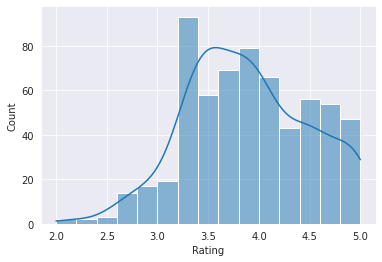

In [16]:
rating = data.loc[data["Rating"] != -1]
print("Skewness:", skew(rating["Rating"]))

sns.histplot(x = "Rating", data = rating, kde = True)

Karena nilai skewness berada pada rentang (-0.5, 0.5) dan berdasarkan plot histogram di atas, dapat diasumsikan distribusi kolom "Rating" simetris, sehingga akan digunakan imputasi Mean pada kolom tersebut.

In [17]:
# Mean imputation on Rating column

avg_rating = data.loc[data["Rating"] != -1, "Rating"].mean()

data["Rating"] = data["Rating"].apply(lambda x: avg_rating if x == -1 else x)

### Headquarters

Karena kolom "Headquarters" berisikan *categorical value*, maka akan dilakukan imputasi Mode pada kolom tersebut.

In [18]:
# Mode imputation on Headquarters columns

mode_hq = data.loc[data["Headquarters"] != "-1", "Headquarters"].mode()[0]

data["Headquarters"] = data["Headquarters"].apply(lambda x: mode_hq if x == "-1" else x)

### Size

Karena kolom "Size" berisikan *categorical value*, maka akan dilakukan imputasi Mode pada kolom tersebut.

In [19]:
# Mode imputation on Size columns

mode_size = data[~data["Size"].isin(["-1", "Unknown"])]["Size"].mode()[0]

data["Size"] = data["Size"].apply(lambda x: mode_size if x in ["-1", "Unknown"] else x)

### Founded

Skewness: -2.19438884646929


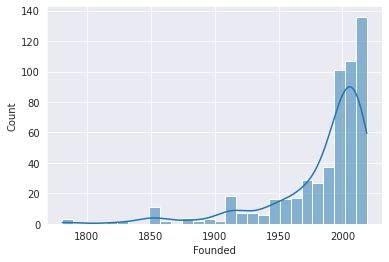

In [20]:
founded = data.loc[data["Founded"] != -1]
print("Skewness:", skew(founded["Founded"]))

sns.histplot(x = "Founded", data = founded, kde = True)

Karena skewness bernilai negatif, maka jelas sebaran data tersebut berfokus pada nilai yang lebih besar (kebanyakan perusahaan dibangun pada akhir abad 20 hingga awal abad 21) dan berdasarkan plot histogram di atas, dapat dilakukan imputasi Median maupun Mode pada kolom tersebut. Namun, pada analisis ini akan dilakukan dengan pendekatan Mode.

In [21]:
# Mode imputation on Founded columns

mode_founded = data.loc[data["Founded"] != -1, "Founded"].mode()[0]

data["Founded"] = data["Founded"].apply(lambda x: mode_founded if x == -1 else x)

### Ownership

Karena kolom "Ownership" berisikan *categorical value*, maka akan dilakukan imputasi Mode pada kolom tersebut.

In [22]:
# Mode imputation on Type of ownership columns

mode_type = data[~data["Type of ownership"].isin(["-1", "Unknown"])]["Type of ownership"].mode()[0]

data["Type of ownership"] = data["Type of ownership"].apply(lambda x: mode_type if x in ["-1", "Unknown"] else x)

### Industry

Karena kolom "Industry" berisikan *categorical value*, maka akan dilakukan imputasi Mode pada kolom tersebut.

In [23]:
# Mode imputation on Industry columns

mode_industry = data[data["Industry"] != "-1"]["Industry"].mode()[0]

data["Industry"] = data["Industry"].apply(lambda x: mode_industry if x == "-1" else x)

### Sector

Karena kolom "Sector" berisikan *categorical value*, maka akan dilakukan imputasi Mode pada kolom tersebut.

In [24]:
# Mode imputation on Sector columns

mode_sector = data[data["Sector"] != "-1"]["Sector"].mode()[0]

data["Sector"] = data["Sector"].apply(lambda x: mode_sector if x == "-1" else x)

## Data Result

In [25]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
index,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services
...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology


# Duplicate Rows Handling

In [26]:
print(len(data.drop_duplicates())/len(data))

0.9806547619047619


Perhatikan bahwa rasio jumlah data setelah dan sebelum dilakukan *drop duplicate* tidak sama dengan 1. Berarti, terdapat beberapa data yang merupakan duplikat dan sebaiknya dihilangkan agar tidak menimbulkan bias pada analisis.

In [27]:
data = data.drop_duplicates()

# Others

Kemudian, akan dilakukan "manipulasi" nilai terhadap beberapa kolom sehingga lebih mudah untuk dilakukan analisis.

## Job Title

In [28]:
data['Job Title'].value_counts().head(50)

Data Scientist                                                                                      326
Data Engineer                                                                                        26
Senior Data Scientist                                                                                19
Machine Learning Engineer                                                                            15
Data Analyst                                                                                         12
Senior Data Analyst                                                                                   6
Data Scientist - TS/SCI FSP or CI Required                                                            4
Data Science Software Engineer                                                                        4
ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR      4
Senior Data Engineer                                            

In [29]:
data['Job Title'].value_counts().tail(50)

Senior Data Scientist - Algorithms                        1
Machine Learning Scientist - Bay Area, CA                 1
Sr Data Analyst                                           1
Computational Scientist                                   1
Geospatial Data Scientist                                 1
Say Business Data Analyst                                 1
ELISA RESEARCH SCIENTIST (CV-15)                          1
Sr Scientist - Extractables & Leachables                  1
Staff Scientist- Upstream PD                              1
Analytics Manager                                         1
Scientist - Biomarker and Flow Cytometry                  1
Research Scientist Patient Preferences (Remote)           1
AI Data Scientist                                         1
Tableau Data Engineer 20-0117                             1
Data Integration and Modeling Engineer                    1
Applied Technology Researcher / Data Scientist            1
Health Data Scientist - Biomedical/Biost

In [30]:
def clean_job_title(x):
    if 'data scientist' in x.lower():
        return 'data scientist'
    elif 'data engineer' in x.lower():
        return 'data engineer'
    elif 'machine learning engineer' in x.lower():
        return 'ml engineer'
    elif 'data analyst' in x.lower():
        return 'data analyst'
    elif 'machine learning scientist' in x.lower():
        return 'ml scientist'
    elif 'business intelligence' in x.lower():
        return 'business intelligence'
    elif 'research scientist' in x.lower():
        return 'research scientist'
    elif 'data science manager' in x.lower():
        return 'data science manager'
    else:
        return 'others'


data['Job Title'] = data['Job Title'].apply(clean_job_title)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Salary

In [31]:
data["Salary Estimate"].value_counts().head(25)

$75K-$131K (Glassdoor est.)     32
$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     28
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$110K-$163K (Glassdoor est.)    20
$79K-$147K (Glassdoor est.)     20
$145K-$225K(Employer est.)      20
$31K-$56K (Glassdoor est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
Name: Salary Estimate, dtype: int64

In [32]:
def minSalary(text):
  nums = re.findall(r'[0-9]+', text)
  nums = [int(salary) for salary in nums]

  return nums[0]

def maxSalary(text):
  nums = re.findall(r'[0-9]+', text)
  nums = [int(salary) for salary in nums]

  return nums[1]

def salaryMean(text):
  nums = re.findall(r'[0-9]+', text)
  nums = [int(salary) for salary in nums]

  return np.mean(nums)

In [33]:
# A bit data manipulation

data["Minimum Salary"] = data["Salary Estimate"].apply(minSalary)
data["Maximum Salary"] = data["Salary Estimate"].apply(maxSalary)

data["Salary Estimate"] = data["Salary Estimate"].apply(salaryMean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

## Company Name

In [34]:
data["Company Name"]

index
0               Healthfirst\n3.1
1                   ManTech\n4.2
2            Analysis Group\n3.8
3                   INFICON\n3.5
4        Affinity Solutions\n2.9
                 ...            
667                TRANZACT\n3.6
668                         JKGT
669                   AccessHope
670    ChaTeck Incorporated\n5.0
671           1-800-Flowers\n2.7
Name: Company Name, Length: 659, dtype: object

In [35]:
data["Company Name"] = data["Company Name"].apply(lambda x: x.split("\n")[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Final Cleaned Data

In [36]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
index,,,,,,,,,,,,,,
0,data scientist,154.0,Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,137,171
1,data scientist,154.0,"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,137,171
2,data scientist,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,137,171
3,data scientist,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,137,171
4,data scientist,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,137,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,data scientist,136.0,Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,105,167
668,data scientist,136.0,Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology,105,167
669,data scientist,136.0,Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology,105,167


# Data Manipulation

## Workload

In [37]:
# We can create the workload feature assuming that the length of the 
# job description is positively proportional with the actual workload 
data['Workload'] = data['Job Description'].str.len()

# To make the value bounded, we will scaled it into the range of [0,1] using min-max scaling method
data['Workload'] = (data['Workload'] - data['Workload'].min()) / (data['Workload'].max() - data['Workload'].min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Needed Skills

In [38]:
data['Python'] = data['Job Description'].str.lower().str.contains('python')
data['Excel'] = data['Job Description'].str.lower().str.contains('excel')
data['Hadoop'] = data['Job Description'].str.lower().str.contains('hadoop')
data['Sspark'] = data['Job Description'].str.lower().str.contains('spark')
data['Tableau'] = data['Job Description'].str.lower().str.contains('tableau')
data['Big data'] = data['Job Description'].str.lower().str.contains('big data')
data['Deep learning'] = data['Job Description'].str.lower().str.contains('deep learning')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [39]:
data_Python = data[data["Python"] == True]
data_Excel = data[data["Excel"] == True]
data_Hadoop = data[data["Hadoop"] == True]
data_Sspark = data[data["Sspark"] == True]
data_Tableau = data[data["Tableau"] == True]
data_Bigdata = data[data["Big data"] == True]
data_Deeplearning = data[data["Deep learning"] == True]

## Company State

In [40]:
data["Company State"] = data["Location"].apply(lambda x: x.split(", ")[-1] if len(x.split(", ")) >= 2 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
data["Company State"].value_counts()

CA               154
VA                89
MA                62
NY                52
MD                40
IL                30
DC                26
TX                17
WA                16
OH                14
PA                12
MO                12
United States     11
NJ                10
CO                10
NC                 9
GA                 9
TN                 8
FL                 8
OK                 6
WI                 6
Remote             5
IN                 5
MI                 5
CT                 4
AL                 4
MN                 4
AZ                 4
NE                 3
IA                 3
RI                 2
New Jersey         2
SC                 2
OR                 2
UT                 2
Utah               2
NH                 2
MS                 1
LA                 1
KS                 1
Texas              1
DE                 1
California         1
WV                 1
Name: Company State, dtype: int64

In [42]:
def companyState(x):
  if x == "United States" or x == "California":
    return "CA"
  elif x == "New Jersey":
    return "NJ"
  elif x == "Texas":
    return "TX"
  elif x == "Utah":
    return "UT"
  elif x == "Remote":
    return "Others"
  
  else:
    return x

In [43]:
data["Company State"] = data["Company State"].apply(companyState)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data["Company State"].value_counts()

CA        166
VA         89
MA         62
NY         52
MD         40
IL         30
DC         26
TX         18
WA         16
OH         14
PA         12
NJ         12
MO         12
CO         10
GA          9
NC          9
FL          8
TN          8
OK          6
WI          6
MI          5
Others      5
IN          5
AZ          4
CT          4
MN          4
AL          4
UT          4
IA          3
NE          3
SC          2
OR          2
RI          2
NH          2
MS          1
LA          1
KS          1
DE          1
WV          1
Name: Company State, dtype: int64

## Data Result

In [45]:
data = data[["Job Title", "Minimum Salary", "Maximum Salary", "Salary Estimate", "Job Description", 
             "Rating", "Company Name", "Location", "Headquarters", "Company State", "Size", "Founded",
             "Type of ownership", "Industry", "Sector", "Workload", "Python", "Excel", "Hadoop", "Sspark",
             "Tableau", "Big data", "Deep learning"]]

In [46]:
data

,Job Title,Minimum Salary,Maximum Salary,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Company State,...,Industry,Sector,Workload,Python,Excel,Hadoop,Sspark,Tableau,Big data,Deep learning
index,,,,,,,,,,,,,,,,,,,,,
0,data scientist,137,171,154.0,Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst,"New York, NY","New York, NY",NY,...,Insurance Carriers,Insurance,0.317421,False,False,False,False,False,False,False
1,data scientist,137,171,154.0,"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech,"Chantilly, VA","Herndon, VA",VA,...,Research & Development,Business Services,0.383144,False,False,True,False,False,True,False
2,data scientist,137,171,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group,"Boston, MA","Boston, MA",MA,...,Consulting,Business Services,0.830192,True,True,False,False,False,False,False
3,data scientist,137,171,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",MA,...,Electrical & Electronic Manufacturing,Manufacturing,0.313594,True,True,False,False,False,False,True
4,data scientist,137,171,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions,"New York, NY","New York, NY",NY,...,Advertising & Marketing,Business Services,0.254185,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,data scientist,105,167,136.0,Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",NJ,...,Advertising & Marketing,Business Services,0.342677,True,True,True,False,True,True,False
668,data scientist,105,167,136.0,Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA","New York, NY",CA,...,Biotech & Pharmaceuticals,Information Technology,0.112886,False,False,False,False,False,False,False
669,data scientist,105,167,136.0,Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",CA,...,Biotech & Pharmaceuticals,Information Technology,0.260404,True,True,True,False,True,False,False


# Data Agg

## Company State vs Skills needed

In [47]:
# Count Aggregation based on one column
data_skills = data.groupby(['Company State'])[['Workload']].count()
data_skills

,Workload
Company State,
AL,4
AZ,4
CA,166
CO,10
CT,4
DC,26
DE,1
FL,8
GA,9


In [48]:
data_skills = data_skills.rename(columns = {"Workload": "# of Company"})

In [49]:
data_Python = data.loc[data["Python"] == 1]
data_Excel = data.loc[data["Excel"] == 1]
data_Hadoop = data.loc[data["Hadoop"] == 1]
data_Sspark = data.loc[data["Sspark"] == 1]
data_Tableau = data.loc[data["Tableau"] == 1]
data_Bigdata = data.loc[data["Big data"] == 1]
data_Deeplearning = data.loc[data["Deep learning"] == 1]

In [50]:
data_skills["Python"] = data_Python.groupby(['Company State'], sort = False)[['Python']].count()
data_skills["Excel"] = data_Excel.groupby(['Company State'], sort = False)[['Excel']].count()
data_skills["Hadoop"] = data_Hadoop.groupby(['Company State'], sort = False)[['Hadoop']].count()
data_skills["Sspark"] = data_Sspark.groupby(['Company State'], sort = False)[['Sspark']].count()
data_skills["Tableau"] = data_Tableau.groupby(['Company State'], sort = False)[['Tableau']].count()
data_skills["Big Data"] = data_Bigdata.groupby(['Company State'], sort = False)[['Big data']].count()
data_skills["Deep Learning"] = data_Deeplearning.groupby(['Company State'], sort = False)[['Deep learning']].count()

In [51]:
data_skills

,# of Company,Python,Excel,Hadoop,Sspark,Tableau,Big Data,Deep Learning
Company State,,,,,,,,
AL,4,3.0,NaN,1.0,1.0,NaN,1.0,NaN
AZ,4,2.0,2.0,1.0,NaN,NaN,1.0,NaN
CA,166,137.0,67.0,36.0,49.0,38.0,47.0,30.0
CO,10,7.0,3.0,3.0,4.0,1.0,1.0,3.0
CT,4,4.0,1.0,NaN,2.0,1.0,2.0,NaN
DC,26,19.0,15.0,7.0,9.0,8.0,4.0,2.0
DE,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN
FL,8,8.0,5.0,6.0,6.0,2.0,3.0,NaN
GA,9,9.0,8.0,3.0,3.0,2.0,2.0,4.0


In [52]:
data_skills["Skills Needed"] = data_skills.count(axis = 1) - 1

In [53]:
data_skills

,# of Company,Python,Excel,Hadoop,Sspark,Tableau,Big Data,Deep Learning,Skills Needed
Company State,,,,,,,,,
AL,4,3.0,NaN,1.0,1.0,NaN,1.0,NaN,4
AZ,4,2.0,2.0,1.0,NaN,NaN,1.0,NaN,4
CA,166,137.0,67.0,36.0,49.0,38.0,47.0,30.0,7
CO,10,7.0,3.0,3.0,4.0,1.0,1.0,3.0,7
CT,4,4.0,1.0,NaN,2.0,1.0,2.0,NaN,5
DC,26,19.0,15.0,7.0,9.0,8.0,4.0,2.0,7
DE,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2
FL,8,8.0,5.0,6.0,6.0,2.0,3.0,NaN,6
GA,9,9.0,8.0,3.0,3.0,2.0,2.0,4.0,7


In [54]:
data_skills["Skills Needed"].value_counts()

7    12
5     6
6     6
2     5
1     4
4     3
0     2
3     1
Name: Skills Needed, dtype: int64

In [55]:
data_skills.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
# of Company,39.0,16.897436,30.749236,1.0,3.00,6.0,13.00,166.0
Python,34.0,14.088235,25.809756,1.0,2.25,6.0,10.50,137.0
Excel,32.0,9.218750,13.499664,1.0,2.00,3.5,9.50,67.0
Hadoop,24.0,5.916667,7.851428,1.0,1.00,3.0,6.25,36.0
Sspark,24.0,7.375000,10.328569,1.0,2.00,4.0,7.50,49.0
Tableau,23.0,5.304348,8.401487,1.0,1.00,2.0,6.00,38.0
Big Data,26.0,5.307692,9.702656,1.0,1.00,2.0,4.00,47.0
Deep Learning,16.0,6.062500,7.397916,1.0,2.00,3.0,7.00,30.0
Skills Needed,39.0,4.589744,2.369965,0.0,2.00,5.0,7.00,7.0


## Company State vs Skills needed (%)

In [56]:
data_skills_percentage = data_skills

python_percentage = []
for state in data_skills.index:
  python_percentage.append(data_skills[data_skills.index == state]["Python"][-1]/data_skills[data_skills.index == state]["# of Company"][-1])

excel_percentage = []
for state in data_skills.index:
  excel_percentage.append(data_skills[data_skills.index == state]["Excel"][-1]/data_skills[data_skills.index == state]["# of Company"][-1])

hadoop_percentage = []
for state in data_skills.index:
  hadoop_percentage.append(data_skills[data_skills.index == state]["Hadoop"][-1]/data_skills[data_skills.index == state]["# of Company"][-1])

sspark_percentage = []
for state in data_skills.index:
  sspark_percentage.append(data_skills[data_skills.index == state]["Sspark"][-1]/data_skills[data_skills.index == state]["# of Company"][-1])

tableau_percentage = []
for state in data_skills.index:
  tableau_percentage.append(data_skills[data_skills.index == state]["Tableau"][-1]/data_skills[data_skills.index == state]["# of Company"][-1])

bigdata_percentage = []
for state in data_skills.index:
  bigdata_percentage.append(data_skills[data_skills.index == state]["Big Data"][-1]/data_skills[data_skills.index == state]["# of Company"][-1])

deeplearning_percentage = []
for state in data_skills.index:
  deeplearning_percentage.append(data_skills[data_skills.index == state]["Deep Learning"][-1]/data_skills[data_skills.index == state]["# of Company"][-1])

data_skills_percentage["Python"] = python_percentage
data_skills_percentage["Excel"] = excel_percentage
data_skills_percentage["Hadoop"] = hadoop_percentage
data_skills_percentage["Sspark"] = sspark_percentage
data_skills_percentage["Tableau"] = tableau_percentage
data_skills_percentage["Big Data"] = bigdata_percentage
data_skills_percentage["Deep Learning"] = deeplearning_percentage

In [57]:
data_skills_percentage

,# of Company,Python,Excel,Hadoop,Sspark,Tableau,Big Data,Deep Learning,Skills Needed
Company State,,,,,,,,,
AL,4,0.750000,NaN,0.250000,0.250000,NaN,0.250000,NaN,4
AZ,4,0.500000,0.500000,0.250000,NaN,NaN,0.250000,NaN,4
CA,166,0.825301,0.403614,0.216867,0.295181,0.228916,0.283133,0.180723,7
CO,10,0.700000,0.300000,0.300000,0.400000,0.100000,0.100000,0.300000,7
CT,4,1.000000,0.250000,NaN,0.500000,0.250000,0.500000,NaN,5
DC,26,0.730769,0.576923,0.269231,0.346154,0.307692,0.153846,0.076923,7
DE,1,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2
FL,8,1.000000,0.625000,0.750000,0.750000,0.250000,0.375000,NaN,6
GA,9,1.000000,0.888889,0.333333,0.333333,0.222222,0.222222,0.444444,7


In [58]:
data_skills_percentage.fillna(value = 0)["Python"][3]

0.7

In [59]:
for col in ["Python", "Excel", "Hadoop", "Sspark", "Tableau", "Big Data", "Deep Learning"]:
  total = 0
  for i in range(len(data_skills_percentage.fillna(value = 0)[col])):
    total += data_skills_percentage.fillna(value = 0)[col][i]*data_skills_percentage.fillna(value = 0)["# of Company"][i]
  print(f"{col}: {total/len(data)}")

Python: 0.7268588770864947
Excel: 0.44764795144157815
Hadoop: 0.21547799696509864
Sspark: 0.26858877086494687
Tableau: 0.18512898330804248
Big Data: 0.2094081942336874
Deep Learning: 0.1471927162367223


In [60]:
for col in ["Python", "Excel", "Hadoop", "Sspark", "Tableau", "Big Data", "Deep Learning"]:
  lst = [0 for _ in range(4)]
  for item in data_skills_percentage.fillna(value = 0)[col]:
    if item % 0.25 != 0 or item == 0:
      lst[math.floor(item/0.25)] += 1

    else:
      lst[int(item/0.25 - 1)] += 1

  print(f"=========== {col} ===========")
  print(lst)
  print(min(data_skills_percentage.fillna(value = 0)[col]), max(data_skills_percentage.fillna(value = 0)[col]))
  print((data_skills_percentage.fillna(value = 0)[col] == min(data_skills_percentage.fillna(value = 0)[col])).sum(),
        (data_skills_percentage.fillna(value = 0)[col] == max(data_skills_percentage.fillna(value = 0)[col])).sum())
  print()

=========== Python ===========
[6, 4, 13, 16]
0.0 1.0
5 10

=========== Excel ===========
[11, 14, 8, 6]
0.0 1.0
7 4

=========== Hadoop ===========
[29, 8, 1, 1]
0.0 1.0
15 1

=========== Sspark ===========
[26, 10, 2, 1]
0.0 1.0
15 1

=========== Tableau ===========
[34, 4, 0, 1]
0.0 1.0
16 1

=========== Big Data ===========
[30, 9, 0, 0]
0.0 0.5
13 2

=========== Deep Learning ===========
[35, 4, 0, 0]
0.0 0.4444444444444444
23 1



In [61]:
for col in ["Python", "Excel", "Hadoop", "Sspark", "Tableau", "Big Data", "Deep Learning"]:
  print(f"============ {col} ===========")
  print(data_skills_percentage.loc[data_skills_percentage.fillna(value = 0)[col] == max(data_skills_percentage.fillna(value = 0)[col])].index)
  print(data_skills_percentage.loc[data_skills_percentage.fillna(value = 0)[col] == min(data_skills_percentage.fillna(value = 0)[col])].index)
  print()

============ Python ===========
Index(['CT', 'DE', 'FL', 'GA', 'IN', 'KS', 'NH', 'OR', 'UT', 'WV'], dtype='object', name='Company State')
Index(['IA', 'LA', 'MS', 'RI', 'SC'], dtype='object', name='Company State')

============ Excel ===========
Index(['IA', 'KS', 'LA', 'OK'], dtype='object', name='Company State')
Index(['AL', 'DE', 'MN', 'MS', 'OR', 'RI', 'WV'], dtype='object', name='Company State')

============ Hadoop ===========
Index(['DE'], dtype='object', name='Company State')
Index(['CT', 'IA', 'IN', 'KS', 'LA', 'MN', 'MS', 'NE', 'OH', 'OK', 'OR',
       'Others', 'RI', 'SC', 'WV'],
      dtype='object', name='Company State')

============ Sspark ===========
Index(['NH'], dtype='object', name='Company State')
Index(['AZ', 'DE', 'IA', 'IN', 'KS', 'LA', 'MN', 'MS', 'NE', 'OH', 'OK',
       'Others', 'RI', 'SC', 'WV'],
      dtype='object', name='Company State')

============ Tableau ===========
Index(['IA'], dtype='object', name='Company State')
Index(['AL', 'AZ', 'DE', 'KS', 'LA

## Company State vs Salary Est.

In [62]:
# Mean Aggregation based on one column
data_salary_est = data.groupby(['Company State'])[['Salary Estimate']].mean()
data_salary_min = data.groupby(['Company State'])[['Minimum Salary']].mean()
data_salary_max = data.groupby(['Company State'])[['Maximum Salary']].mean()

In [63]:
data_salary_est["Python"] = data_Python.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_est["Excel"] = data_Excel.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_est["Hadoop"] = data_Hadoop.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_est["Sspark"] = data_Sspark.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_est["Tableau"] = data_Tableau.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_est["Big Data"] = data_Bigdata.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_est["Deep Learning"] = data_Deeplearning.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_est["Skills Needed"] = data_skills["Skills Needed"]

data_salary_min["Python"] = data_Python.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_min["Excel"] = data_Excel.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_min["Hadoop"] = data_Hadoop.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_min["Sspark"] = data_Sspark.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_min["Tableau"] = data_Tableau.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_min["Big Data"] = data_Bigdata.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_min["Deep Learning"] = data_Deeplearning.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_min["Skills Needed"] = data_skills["Skills Needed"]

data_salary_max["Python"] = data_Python.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_max["Excel"] = data_Excel.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_max["Hadoop"] = data_Hadoop.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_max["Sspark"] = data_Sspark.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_max["Tableau"] = data_Tableau.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_max["Big Data"] = data_Bigdata.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_max["Deep Learning"] = data_Deeplearning.groupby(['Company State'], sort = False)[['Salary Estimate']].mean()
data_salary_max["Skills Needed"] = data_skills["Skills Needed"]

In [64]:
data_salary_est

,Salary Estimate,Python,Excel,Hadoop,Sspark,Tableau,Big Data,Deep Learning,Skills Needed
Company State,,,,,,,,,
AL,131.125000,139.166667,NaN,133.000000,133.000000,NaN,133.000000,NaN,4
AZ,140.875000,147.000000,143.500000,115.500000,NaN,NaN,115.500000,NaN,4
CA,120.406627,120.255474,121.835821,121.208333,129.224490,119.184211,121.744681,121.050000,7
CO,103.650000,92.642857,98.500000,103.166667,100.500000,43.500000,92.500000,103.166667,7
CT,98.125000,98.125000,92.500000,NaN,101.500000,92.500000,101.500000,NaN,5
DC,139.500000,151.578947,138.133333,135.857143,150.833333,166.437500,155.125000,143.500000,7
DE,271.500000,271.500000,NaN,271.500000,NaN,NaN,NaN,NaN,2
FL,118.437500,118.437500,114.200000,122.583333,122.583333,125.500000,138.500000,NaN,6
GA,109.666667,109.666667,111.812500,104.166667,104.166667,114.250000,110.000000,111.500000,7


In [65]:
data_salary_est

,Salary Estimate,Python,Excel,Hadoop,Sspark,Tableau,Big Data,Deep Learning,Skills Needed
Company State,,,,,,,,,
AL,131.125000,139.166667,NaN,133.000000,133.000000,NaN,133.000000,NaN,4
AZ,140.875000,147.000000,143.500000,115.500000,NaN,NaN,115.500000,NaN,4
CA,120.406627,120.255474,121.835821,121.208333,129.224490,119.184211,121.744681,121.050000,7
CO,103.650000,92.642857,98.500000,103.166667,100.500000,43.500000,92.500000,103.166667,7
CT,98.125000,98.125000,92.500000,NaN,101.500000,92.500000,101.500000,NaN,5
DC,139.500000,151.578947,138.133333,135.857143,150.833333,166.437500,155.125000,143.500000,7
DE,271.500000,271.500000,NaN,271.500000,NaN,NaN,NaN,NaN,2
FL,118.437500,118.437500,114.200000,122.583333,122.583333,125.500000,138.500000,NaN,6
GA,109.666667,109.666667,111.812500,104.166667,104.166667,114.250000,110.000000,111.500000,7


In [66]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/outpur.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  data_salary_est.to_csv(f)

Mounted at /content/drive


In [67]:
data_salary_min

,Minimum Salary,Python,Excel,Hadoop,Sspark,Tableau,Big Data,Deep Learning,Skills Needed
Company State,,,,,,,,,
AL,109.750000,139.166667,NaN,133.000000,133.000000,NaN,133.000000,NaN,4
AZ,115.250000,147.000000,143.500000,115.500000,NaN,NaN,115.500000,NaN,4
CA,96.246988,120.255474,121.835821,121.208333,129.224490,119.184211,121.744681,121.050000,7
CO,83.600000,92.642857,98.500000,103.166667,100.500000,43.500000,92.500000,103.166667,7
CT,79.500000,98.125000,92.500000,NaN,101.500000,92.500000,101.500000,NaN,5
DC,111.346154,151.578947,138.133333,135.857143,150.833333,166.437500,155.125000,143.500000,7
DE,212.000000,271.500000,NaN,271.500000,NaN,NaN,NaN,NaN,2
FL,96.625000,118.437500,114.200000,122.583333,122.583333,125.500000,138.500000,NaN,6
GA,86.333333,109.666667,111.812500,104.166667,104.166667,114.250000,110.000000,111.500000,7


In [68]:
data_salary_max

,Maximum Salary,Python,Excel,Hadoop,Sspark,Tableau,Big Data,Deep Learning,Skills Needed
Company State,,,,,,,,,
AL,152.500000,139.166667,NaN,133.000000,133.000000,NaN,133.000000,NaN,4
AZ,166.500000,147.000000,143.500000,115.500000,NaN,NaN,115.500000,NaN,4
CA,144.566265,120.255474,121.835821,121.208333,129.224490,119.184211,121.744681,121.050000,7
CO,123.700000,92.642857,98.500000,103.166667,100.500000,43.500000,92.500000,103.166667,7
CT,116.750000,98.125000,92.500000,NaN,101.500000,92.500000,101.500000,NaN,5
DC,167.653846,151.578947,138.133333,135.857143,150.833333,166.437500,155.125000,143.500000,7
DE,331.000000,271.500000,NaN,271.500000,NaN,NaN,NaN,NaN,2
FL,140.250000,118.437500,114.200000,122.583333,122.583333,125.500000,138.500000,NaN,6
GA,133.000000,109.666667,111.812500,104.166667,104.166667,114.250000,110.000000,111.500000,7


In [69]:
data_salary_est.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Salary Estimate,39.0,125.048434,27.948387,94.000000,111.020833,121.714286,132.500000,271.5000
Python,34.0,128.601646,31.130270,92.642857,111.225000,123.080357,135.569792,271.5000
Excel,32.0,119.237106,20.624674,83.000000,103.750000,115.138462,125.488636,183.0000
Hadoop,24.0,133.252712,36.691231,99.250000,111.458333,123.229167,137.375000,271.5000
Sspark,24.0,124.016776,22.780248,92.500000,105.666667,121.541667,134.142857,183.0000
Tableau,23.0,115.328092,22.797921,43.500000,105.500000,114.250000,125.950000,166.4375
Big Data,26.0,121.594558,24.201303,92.500000,104.031250,114.750000,132.375000,183.0000
Deep Learning,16.0,122.140924,19.585410,86.750000,106.041667,122.525000,138.336538,150.4000
Skills Needed,39.0,4.589744,2.369965,0.000000,2.000000,5.000000,7.000000,7.0000


## Company State vs. Workload

In [70]:
# Mean Aggregation based on one column
data_workload = data.groupby(['Company State'])[['Workload']].mean()

In [71]:
data_workload["Python"] = data_Python.groupby(['Company State'], sort = False)[['Workload']].mean()
data_workload["Excel"] = data_Excel.groupby(['Company State'], sort = False)[['Workload']].mean()
data_workload["Hadoop"] = data_Hadoop.groupby(['Company State'], sort = False)[['Workload']].mean()
data_workload["Sspark"] = data_Sspark.groupby(['Company State'], sort = False)[['Workload']].mean()
data_workload["Tableau"] = data_Tableau.groupby(['Company State'], sort = False)[['Workload']].mean()
data_workload["Big Data"] = data_Bigdata.groupby(['Company State'], sort = False)[['Workload']].mean()
data_workload["Deep Learning"] = data_Deeplearning.groupby(['Company State'], sort = False)[['Workload']].mean()
data_workload["Skills Needed"] = data_skills["Skills Needed"]

In [72]:
data_workload = data_workload.rename(columns = {"Workload":"Workload overall"})

In [73]:
data_workload

,Workload overall,Python,Excel,Hadoop,Sspark,Tableau,Big Data,Deep Learning,Skills Needed
Company State,,,,,,,,,
AL,0.295035,0.362703,NaN,0.668325,0.668325,NaN,0.668325,NaN,4
AZ,0.306754,0.292500,0.362815,0.365254,NaN,NaN,0.365254,NaN,4
CA,0.303743,0.314176,0.352509,0.340397,0.358089,0.346831,0.321013,0.337335,7
CO,0.357362,0.380943,0.299499,0.336937,0.444872,0.278485,0.768679,0.336937,7
CT,0.417488,0.417488,0.334832,NaN,0.614369,0.334832,0.614369,NaN,5
DC,0.298170,0.296389,0.339341,0.292138,0.270672,0.331352,0.278437,0.280494,7
DE,0.595236,0.595236,NaN,0.595236,NaN,NaN,NaN,NaN,2
FL,0.556503,0.556503,0.737300,0.674065,0.674065,0.404669,0.389075,NaN,6
GA,0.403988,0.403988,0.447312,0.409388,0.409388,0.534057,0.410408,0.260165,7


In [74]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/output workload.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  data_workload.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Graph and Insight Section

## Insight 1

**Python**

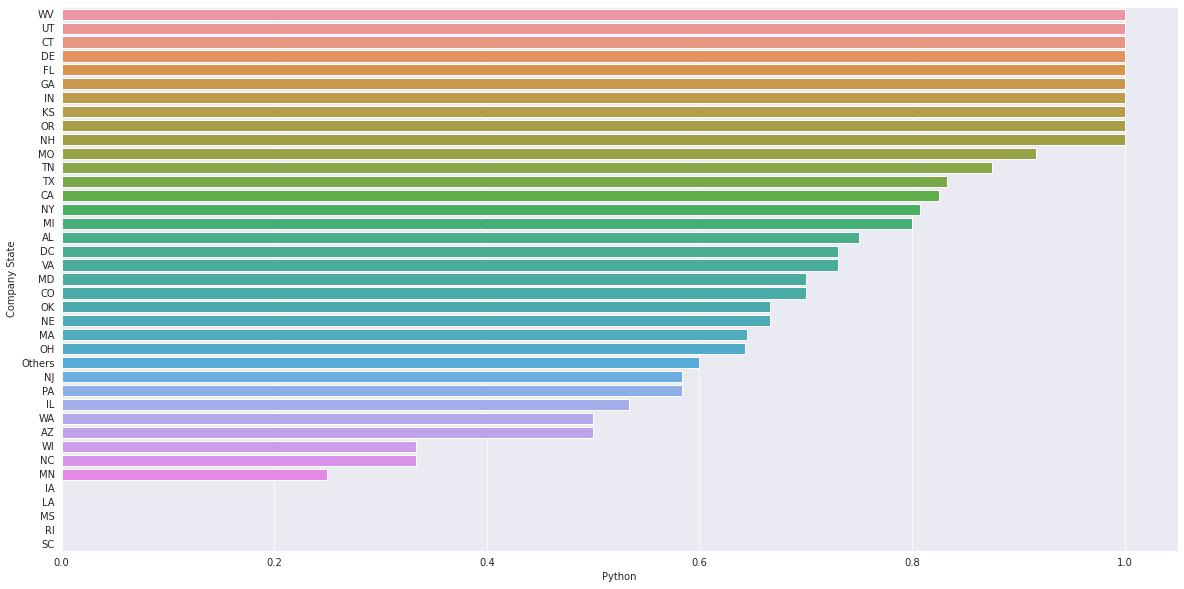

In [75]:
data_skills = data_skills.sort_values(by = "Python", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills["Python"], y = data_skills.index)

**Excel**

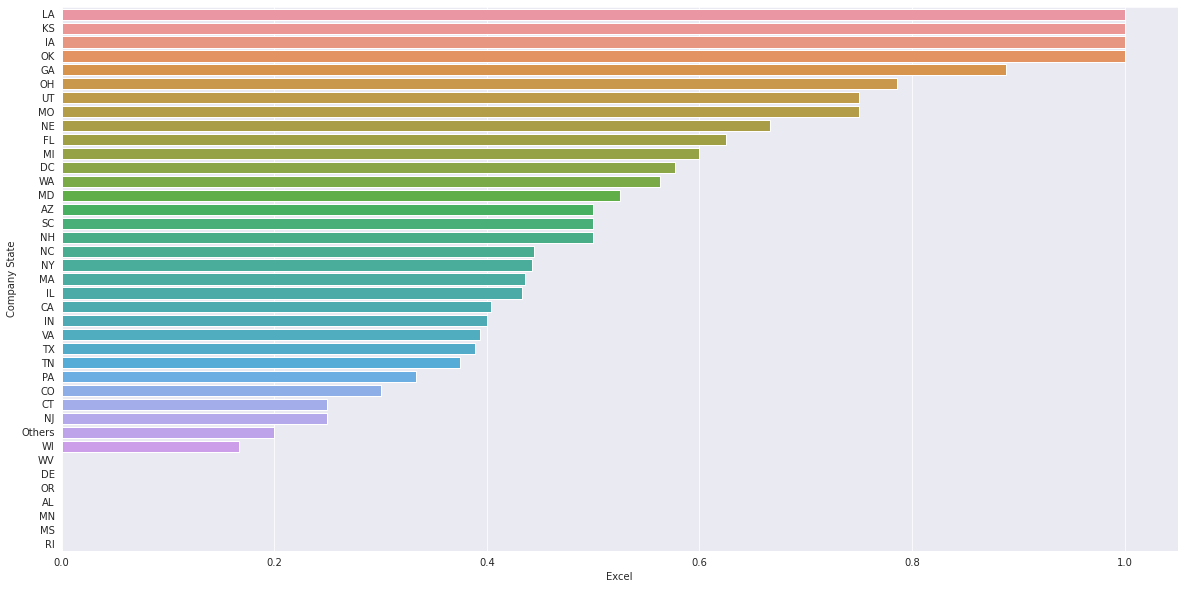

In [76]:
data_skills = data_skills.sort_values(by = "Excel", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills["Excel"], y = data_skills.index)

**Hadoop**

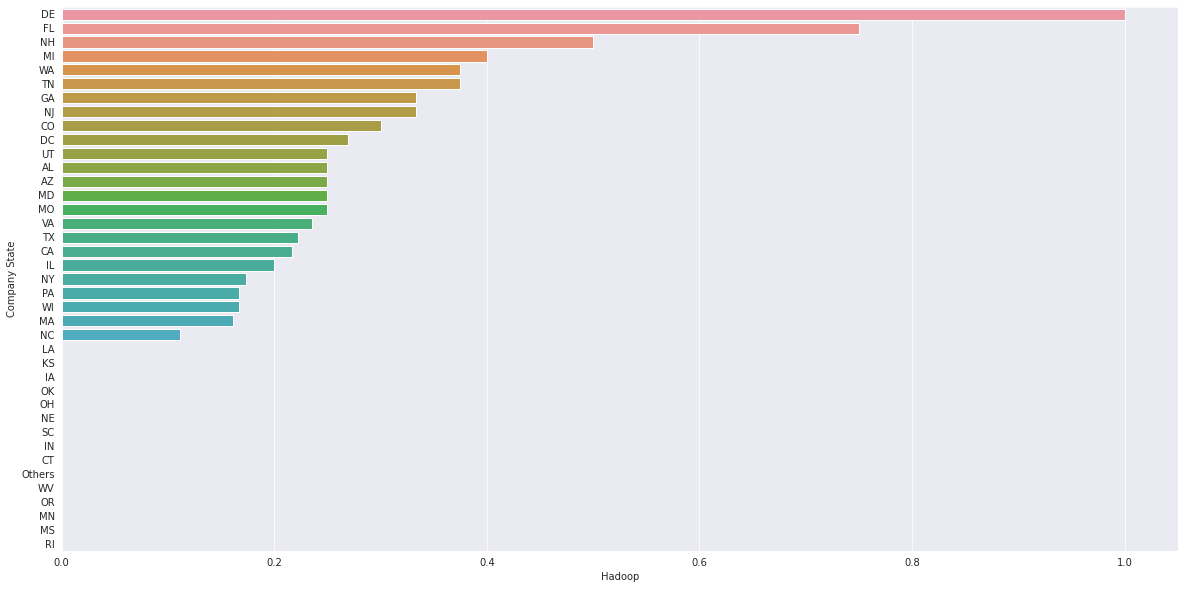

In [77]:
data_skills = data_skills.sort_values(by = "Hadoop", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills["Hadoop"], y = data_skills.index)

**Sspark**

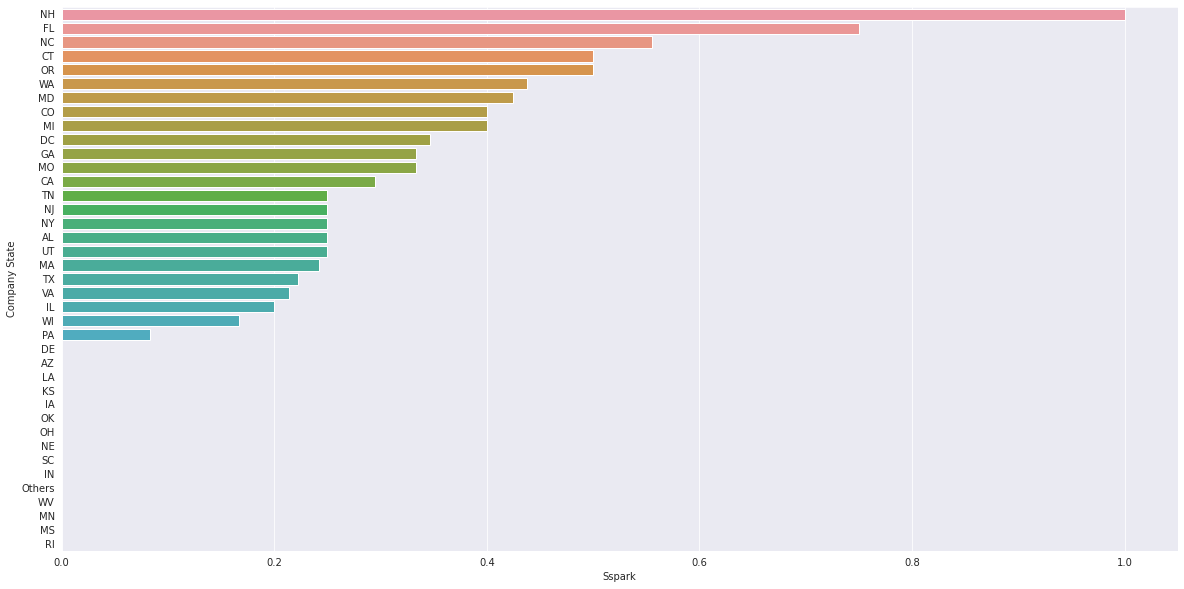

In [78]:
data_skills = data_skills.sort_values(by = "Sspark", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills["Sspark"], y = data_skills.index)

**Tableau**

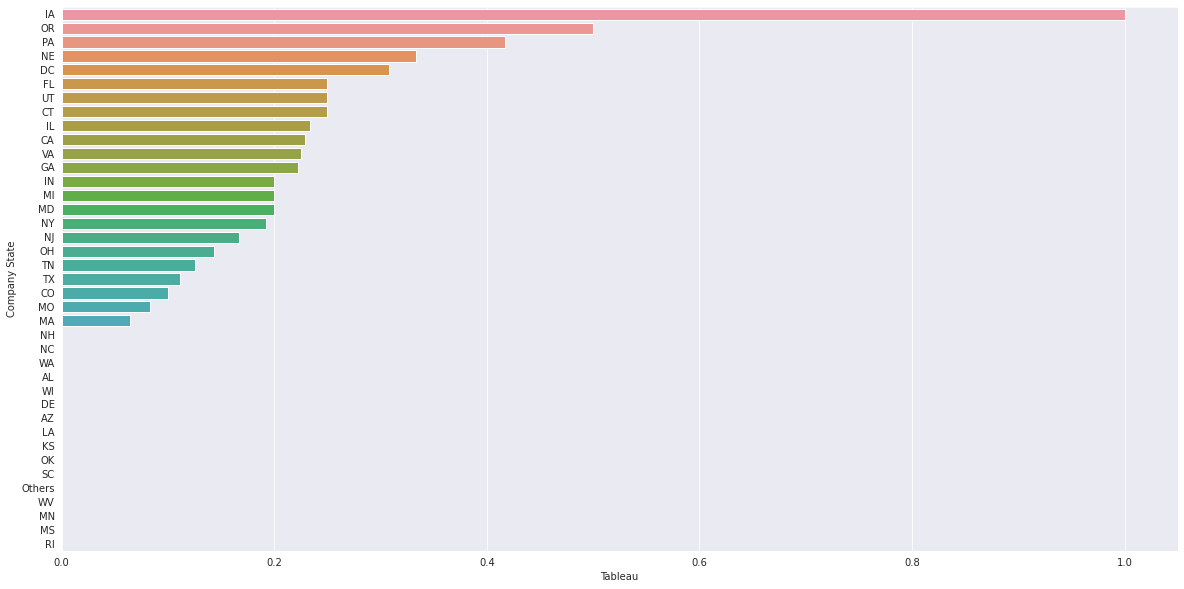

In [79]:
data_skills = data_skills.sort_values(by = "Tableau", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills["Tableau"], y = data_skills.index)

**Big Data**

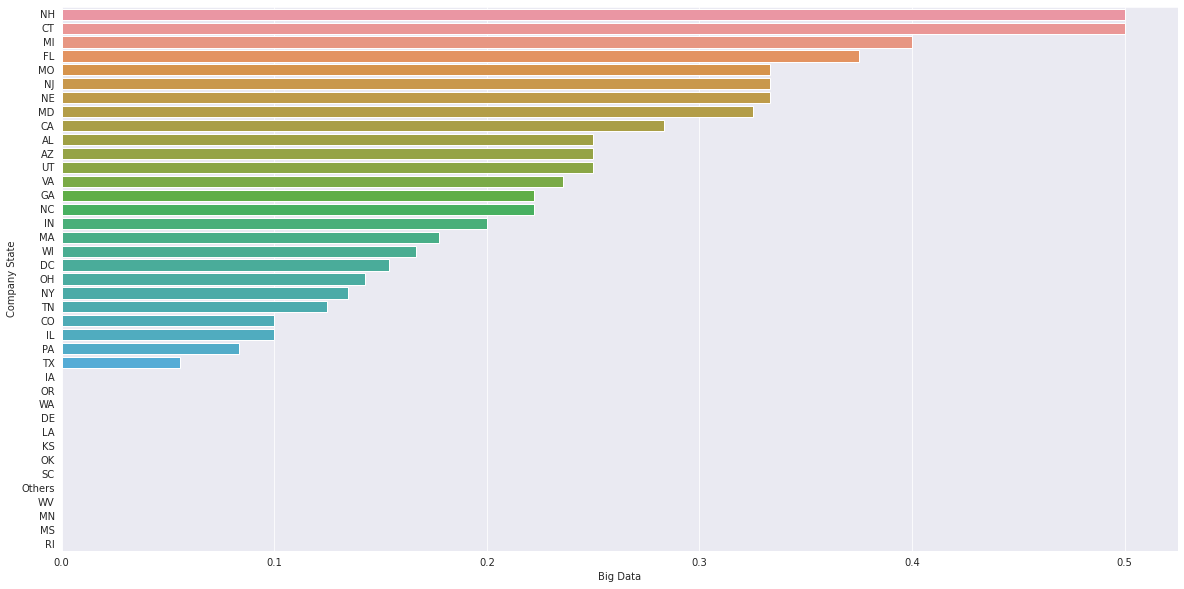

In [80]:
data_skills = data_skills.sort_values(by = "Big Data", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills["Big Data"], y = data_skills.index)

**Deep Learning**

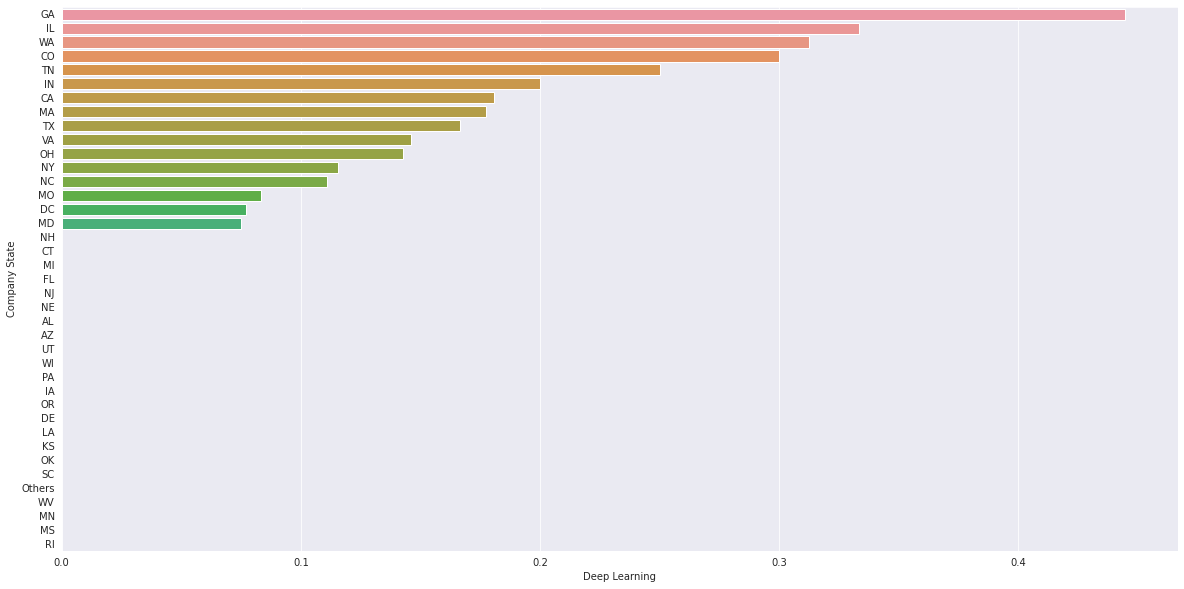

In [81]:
data_skills = data_skills.sort_values(by = "Deep Learning", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills["Deep Learning"], y = data_skills.index)

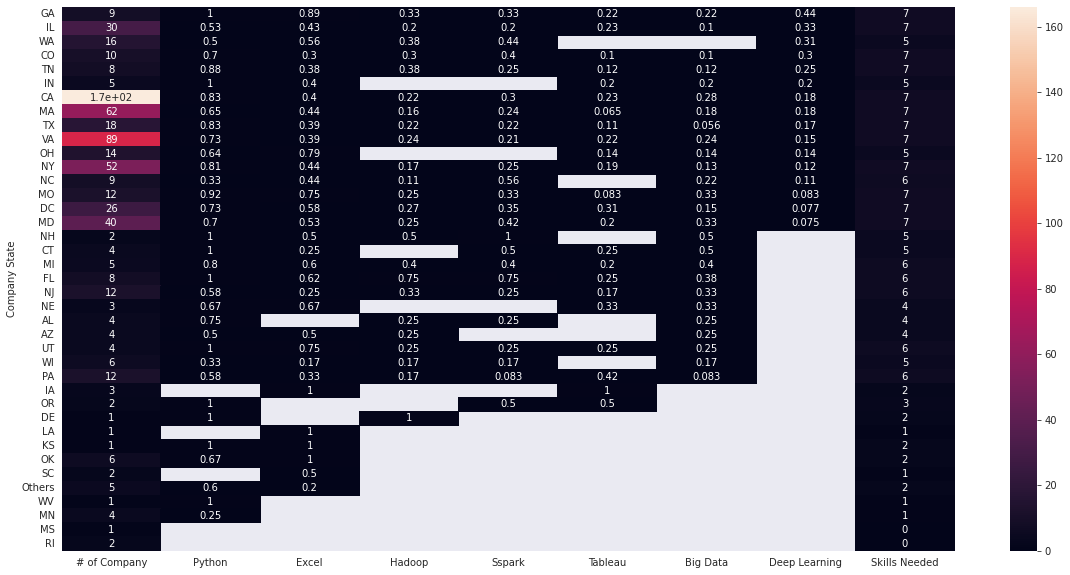

In [82]:
plt.figure(figsize=(20,10))

sns.heatmap(data_skills, annot = True)

Dari seluruh plot di atas, dapat disimpulkan beberapa hal, di antaranya.
1. Terdapat 12 state yang mewajibkan pegawainya untuk menguasai semua skills, di antaranya CA, CO, DC, GA, IL, MA, MD, MO, NY, TN, TX, dan VA. Hal tersebut wajar karena terdapat banyak sekali company yang terletak di sana.
2. CA merupakan state dengan *demand skills* paling tinggi.
3. Company yang terletak di state MS dan RI sama sekali tidak membutuhkan skill apapun dalam pekerjaannya.
3. Jika Anda ada di state MN atau WV, maka skills Python merupakan 'satu-satunya' skills yang wajib Anda kuasai agar dapat memperoleh pekerjaan. Dan jika Anda ada di state LA atau SC, maka skills Excel merupakan 'satu-satunya' skills yang wajib Anda kuasai agar dapat memperoleh pekerjaan. 
4. Secara berurutan, Python, Excel, Big Data, Hadoop, Sspark, Tableau, dan Machine Learning merupakan skills yang paling banyak dibutuhkan oleh perusahaan.

## Insight 2

**Python**

(0.0, 1.0)

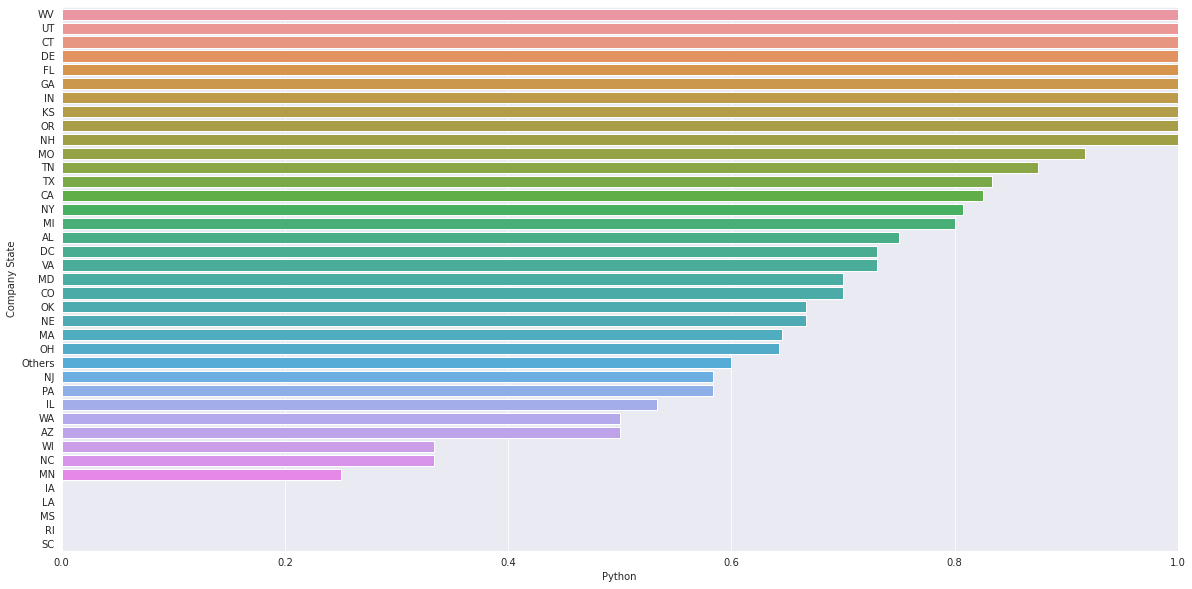

In [83]:
data_skills_percentage = data_skills_percentage.sort_values(by = "Python", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills_percentage["Python"], y = data_skills_percentage.index)
plt.xlim(0, 1)

Berdasarkan grafik di atas, dapat disimpulkan beberapa hal, di antaranya.
1. CT, DE, FL, GA, IN, KS, NH, OR, UT, dan WV merupakan 10 state dengan persentase kebutuhan Python 100%. Berarti, seluruh company di sana mewajibkan seluruh pegawainya untuk menguasai Python.
2. Pada 34 dari 39 State (87.18%) State, terdapat setidaknya 1 company yang menjadikan Python sebagai skill yang dibutuhkan untuk bekerja. Hal tersebut masuk akal karena Python merupakan bahasa yang esensial dalam prospek Data.


**Excel**

(0.0, 1.0)

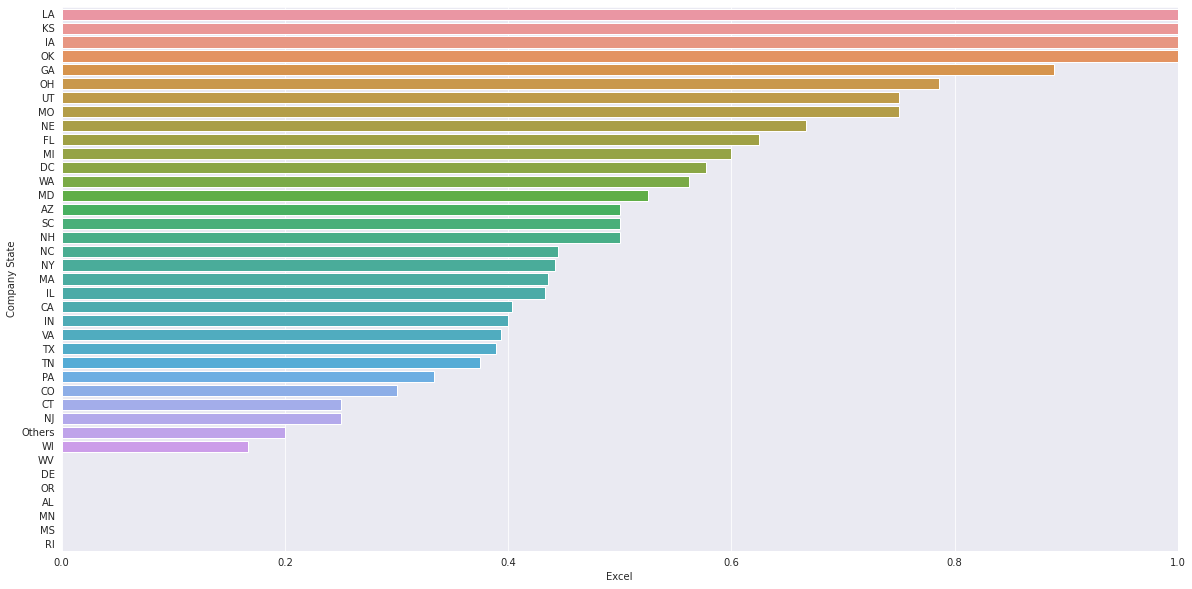

In [84]:
data_skills_percentage = data_skills_percentage.sort_values(by = "Excel", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills_percentage["Excel"], y = data_skills_percentage.index)
plt.xlim(0, 1)

Berdasarkan grafik di atas, dapat disimpulkan beberapa hal, di antaranya.
1. IA, KS, LA, dan OK merupakan 4 state dengan persentase kebutuhan Excel 100%. Berarti, seluruh company di sana mewajibkan seluruh pegawainya untuk menguasai Excel.
2. Pada 32 dari 39 State (82.05%) State, terdapat setidaknya 1 company yang menjadikan Excel sebagai skill yang dibutuhkan untuk bekerja.


**Hadoop**

(0.0, 1.0)

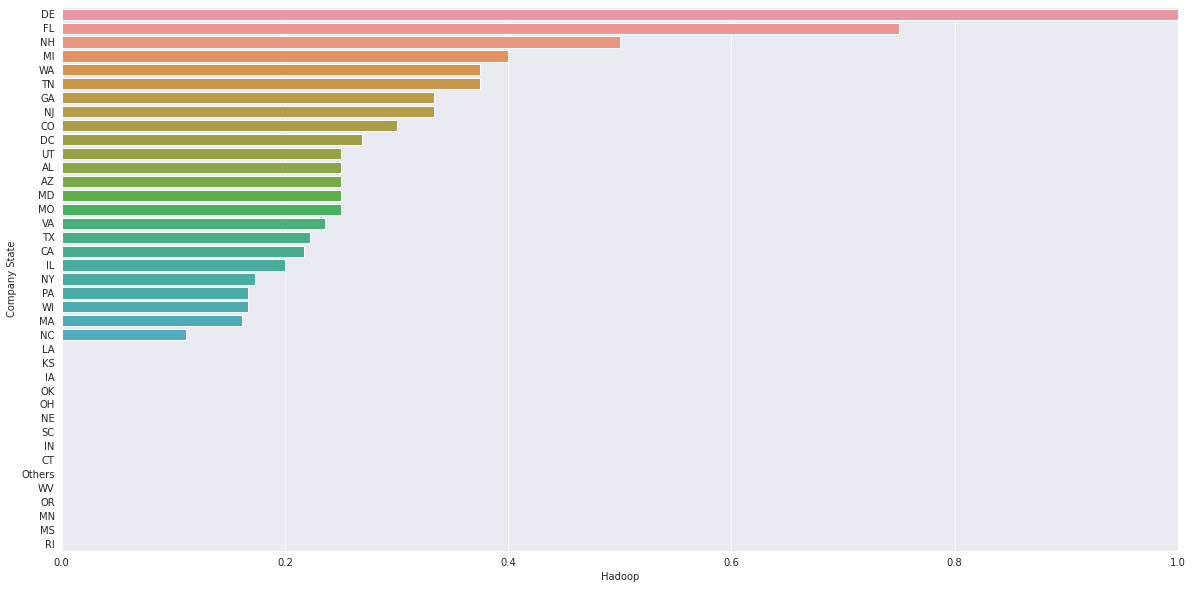

In [85]:
data_skills_percentage = data_skills_percentage.sort_values(by = "Hadoop", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills_percentage["Hadoop"], y = data_skills_percentage.index)
plt.xlim(0, 1)

Berdasarkan grafik di atas, dapat disimpulkan beberapa hal, di antaranya.
1. DE merupakan satu-satunya state dengan persentase kebutuhan Hadoop 100%. Berarti, seluruh company di sana mewajibkan seluruh pegawainya untuk menguasai Hadoop.
2. Pada 24 dari 39 State (61.54%) State, terdapat setidaknya 1 company yang menjadikan Hadoop sebagai skill yang dibutuhkan untuk bekerja.


**Sspark**

(0.0, 1.0)

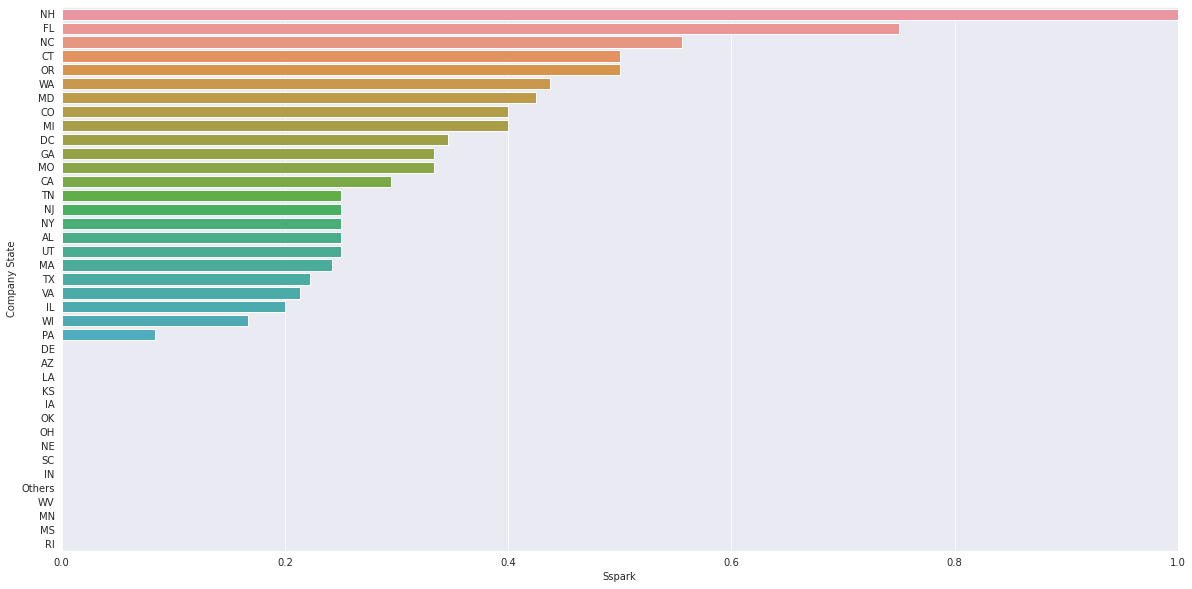

In [86]:
data_skills_percentage = data_skills_percentage.sort_values(by = "Sspark", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills_percentage["Sspark"], y = data_skills_percentage.index)
plt.xlim(0, 1)

Berdasarkan grafik di atas, dapat disimpulkan beberapa hal, di antaranya.
1. NH merupakan satu-satunya state dengan persentase kebutuhan Sspark 100%. Berarti, seluruh company di sana mewajibkan seluruh pegawainya untuk menguasai Sspark.
2. Pada 24 dari 39 State (61.54%) State, terdapat setidaknya 1 company yang menjadikan Sspark sebagai skill yang dibutuhkan untuk bekerja.


**Tableau**

(0.0, 1.0)

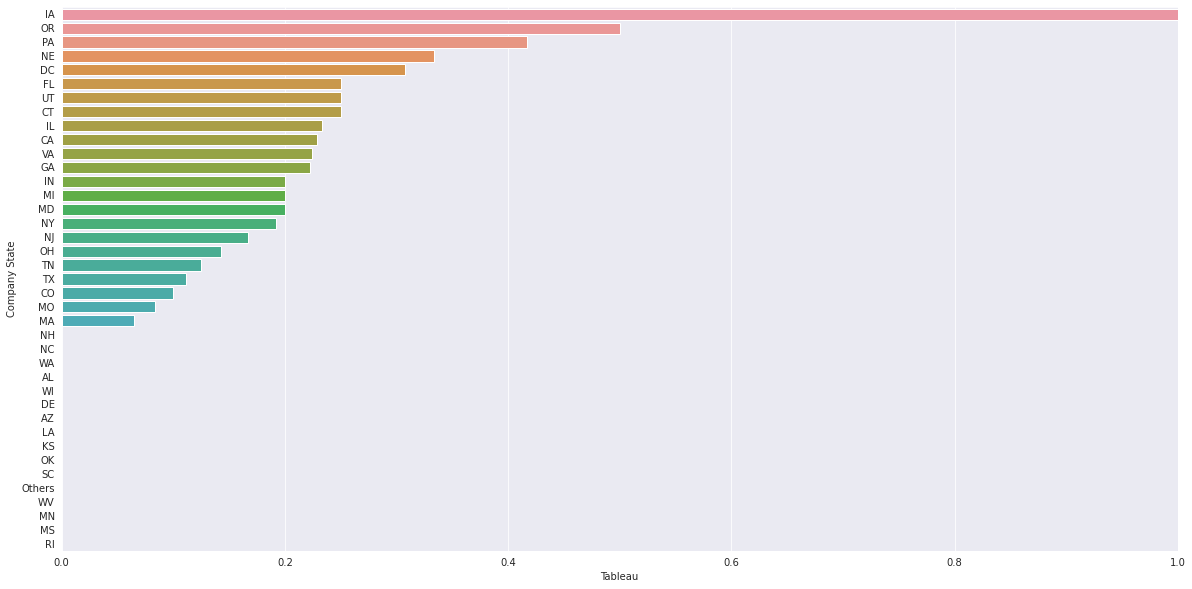

In [87]:
data_skills_percentage = data_skills_percentage.sort_values(by = "Tableau", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills_percentage["Tableau"], y = data_skills_percentage.index)
plt.xlim(0, 1)

Berdasarkan grafik di atas, dapat disimpulkan beberapa hal, di antaranya.
1. IA merupakan satu-satunya state dengan persentase kebutuhan Tableau 100%. Berarti, seluruh company di sana mewajibkan seluruh pegawainya untuk menguasai Tableau.
2. Pada 23 dari 39 State (58.97%) State, terdapat setidaknya 1 company yang menjadikan Tableau sebagai skill yang dibutuhkan untuk bekerja.


**Big Data**

(0.0, 1.0)

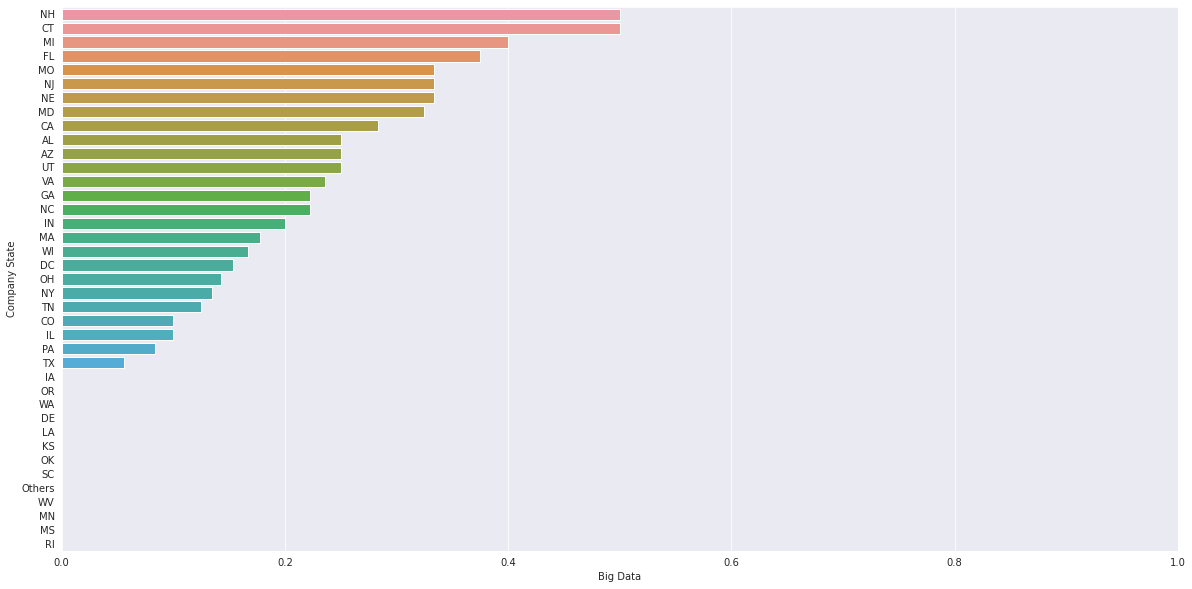

In [88]:
data_skills_percentage = data_skills_percentage.sort_values(by = "Big Data", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills_percentage["Big Data"], y = data_skills_percentage.index)
plt.xlim(0, 1)

Berdasarkan grafik di atas, dapat disimpulkan beberapa hal, di antaranya.
1. Tidak terdapat state dengan persentase kebutuhan Big Data 100%. Berarti, tidak ada state yang seluruh company di sana mewajibkan seluruh pegawainya untuk menguasai Big Data.
2. CT dan NH merupakan state dengan *demand-rate* Big Data tertinggi (50%).
3. Pada 26 dari 39 State (66.67%) State, terdapat setidaknya 1 company yang menjadikan Big Data sebagai skill yang dibutuhkan untuk bekerja.


**Deep Learning**

(0.0, 1.0)

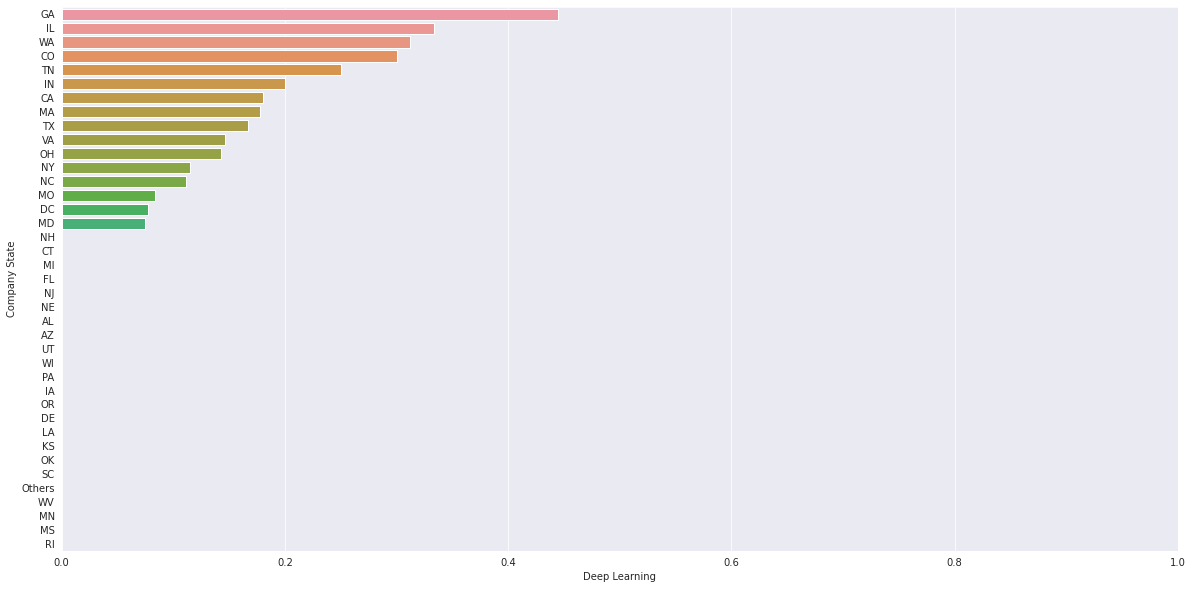

In [89]:
data_skills_percentage = data_skills_percentage.sort_values(by = "Deep Learning", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_skills_percentage["Deep Learning"], y = data_skills_percentage.index)
plt.xlim(0, 1)

Berdasarkan grafik di atas, dapat disimpulkan beberapa hal, di antaranya.
1. Tidak terdapat state dengan persentase kebutuhan Deep Learning 100%. Berarti, tidak ada state yang seluruh company di sana mewajibkan seluruh pegawainya untuk menguasai Deep Learning.
2. GA merupakan state dengan *demand-rate* Big Data tertinggi (50%).
3. Pada 16 dari 39 State (41.03%) State, terdapat setidaknya 1 company yang menjadikan Deep Learning sebagai skill yang dibutuhkan untuk bekerja.


## Insight 3

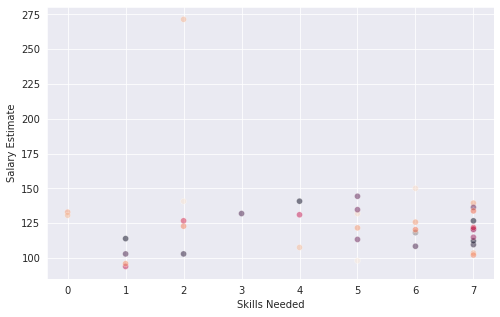

Nilai korelasi Skills Needed dan Salary Estimate: -0.10215366432236693


In [90]:
plt.figure(figsize=(8,5))

# Fixing random state for reproducibility
np.random.seed(10120034)

N = len(data_skills)
colors = np.random.rand(N)
corrcoef = data_salary_est["Skills Needed"].corr(data_salary_est["Salary Estimate"])

sns.scatterplot(x = "Skills Needed", y = "Salary Estimate", data = data_salary_est, c = colors, alpha = 0.5)
plt.xlabel("Skills Needed")
plt.ylabel("Salary Estimate")
plt.show()

print(f"Nilai korelasi Skills Needed dan Salary Estimate: {corrcoef}")

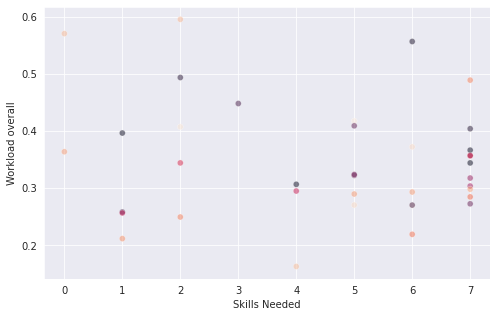

Nilai korelasi Skills Needed dan Workload overall: -0.14265056425899017


In [91]:
plt.figure(figsize=(8,5))

corrcoef = data_workload["Skills Needed"].corr(data_workload["Workload overall"])

sns.scatterplot(x = "Skills Needed", y = "Workload overall", data = data_workload, c = colors, alpha = 0.5)
plt.xlabel("Skills Needed")
plt.ylabel("Workload overall")
plt.show()

print(f"Nilai korelasi Skills Needed dan Workload overall: {corrcoef}")

Berdasarkan scatter plot di atas, dapat disimpulkan bahwa tidak terdapat korelasi antara jumlah Skills Needed, Salary Estimate-nya, serta Workload pada suatu pekerjaan. Hal tersebut berarti semakin banyak skill yang dikuasai seseorang tidak berarti bahwa Salary yang ia dapatkan akan semakin besar. Begitu pula dengan beban kerjanya tidak tentu akan menjadi semakin besar.

## Insight 4

Text(0.5, 1.0, 'Company State vs. Minimum Salary')

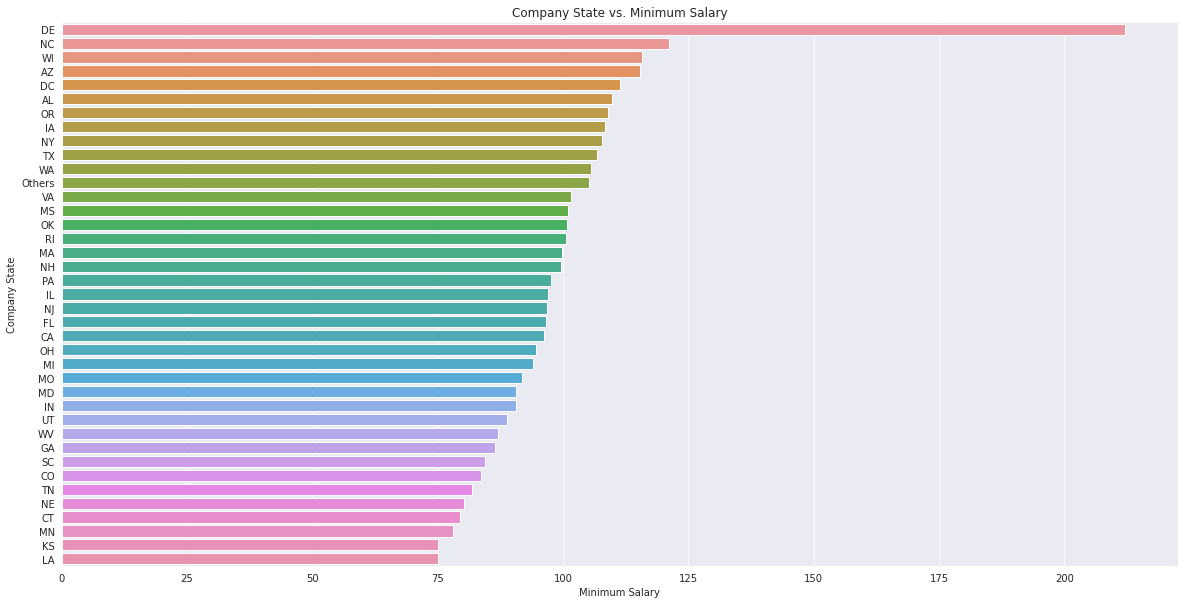

In [92]:
data_salary_min = data_salary_min.sort_values(by = "Minimum Salary", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_salary_min["Minimum Salary"], y = data_salary_min.index).set_title("Company State vs. Minimum Salary")

Berdasarkan grafik di atas, didapat 5 State dengan Minimum Salary tertinggi dan terendah yaitu:

Tertinggi
1. DE
2. NC
3. WI
4. AZ
5. DC

Terendah
1. LA
2. KS
3. MN
4. CT
5. NE

Text(0.5, 1.0, 'Company State vs. Maximum Salary')

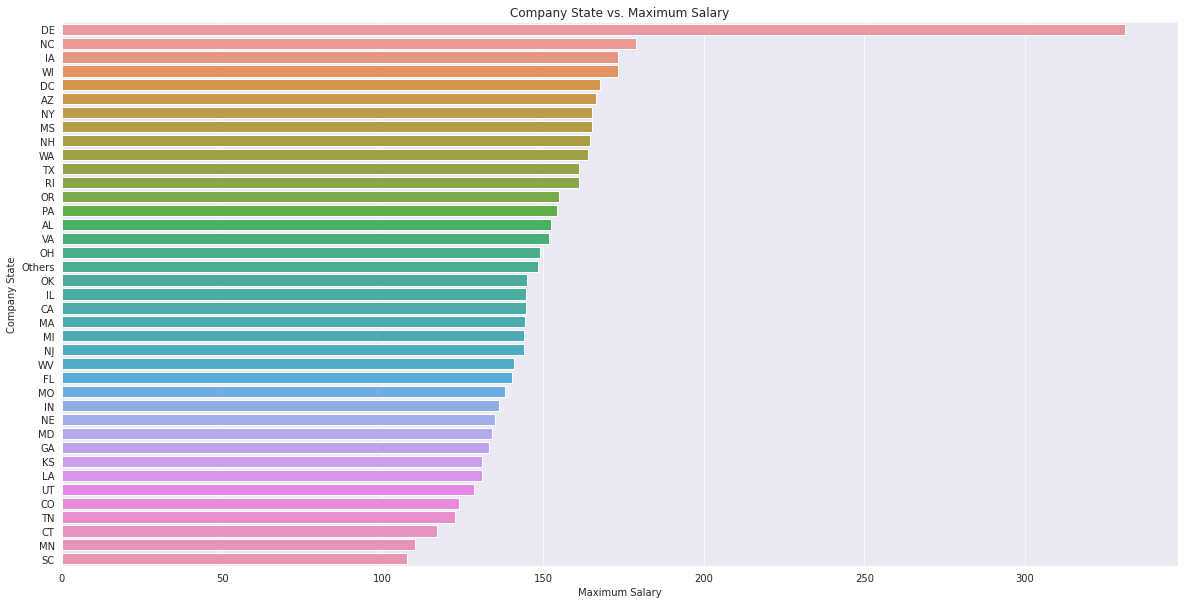

In [93]:
data_salary_max = data_salary_max.sort_values(by = "Maximum Salary", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_salary_max["Maximum Salary"], y = data_salary_max.index).set_title("Company State vs. Maximum Salary")

Berdasarkan grafik di atas, didapat 5 State dengan Maximum Salary tertinggi dan terendah yaitu:

Tertinggi
1. DE
2. NC
3. IA
4. WI
5. DC

Terendah
1. SC
2. MN
3. CT
4. TN
5. CO

Text(0.5, 1.0, 'Company State vs. Salary Estimate')

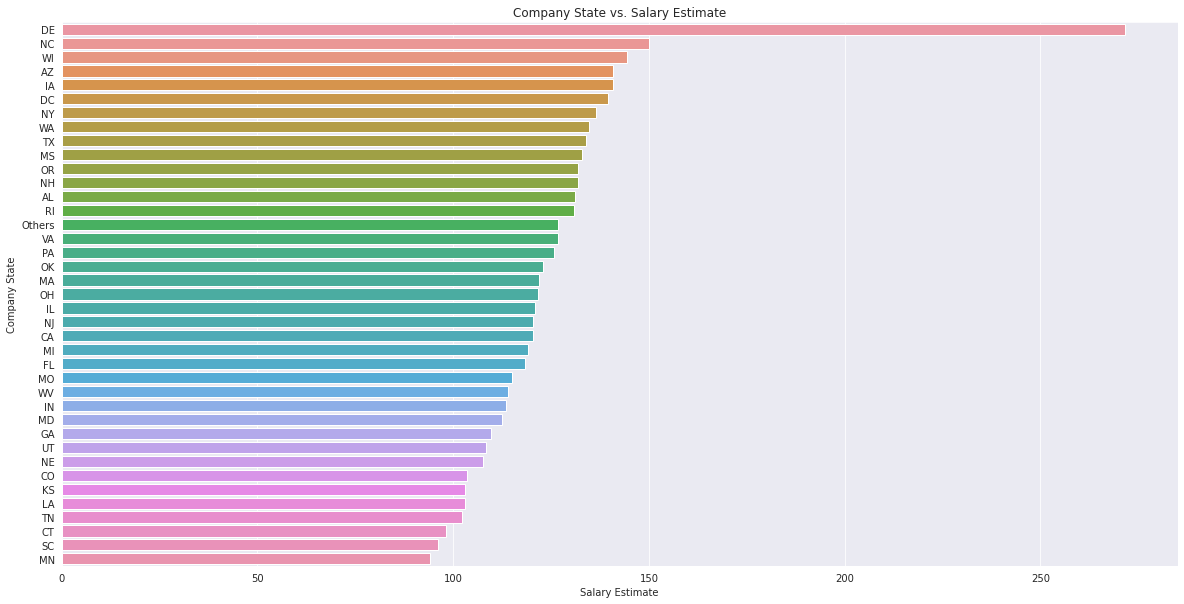

In [94]:
data_salary_est = data_salary_est.sort_values(by = "Salary Estimate", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_salary_est["Salary Estimate"], y = data_salary_est.index).set_title("Company State vs. Salary Estimate")

Berdasarkan grafik di atas, didapat 5 State dengan Salary Estimate tertinggi dan terendah yaitu:

Tertinggi
1. DE
2. NC
3. WI
4. AZ
5. IA

Terendah
1. MN
2. SC
3. CT
4. TN
5. LA


Text(0.5, 1.0, 'Salary Estimate Distribution')

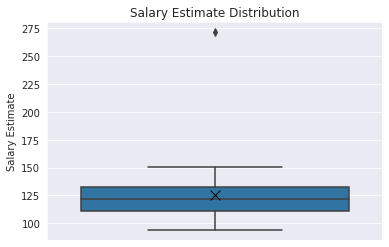

In [95]:
sns.boxplot(y = data_salary_est["Salary Estimate"], showmeans = True, meanprops = {"marker" : "x",
                                                                                   "markerfacecolor":"white", 
                                                                                   "markeredgecolor":"black",
                                                                                   "markersize":"10"}).set_title("Salary Estimate Distribution")

Berdasarkan grafik di atas, dapat disimpulkan bahwa persebaran Salary Estimate relatif merata pada setiap State dengan nilainya tersebar pada rataan sekitar $125K. Hanya saja, terdapat 1 State dengan Salary yang relatif jauh lebih tinggi dibandingkan dengan State lainnya (pencilan atas), yaitu state "DE".

Text(0.5, 1.0, 'Company State vs. Skills Needed')

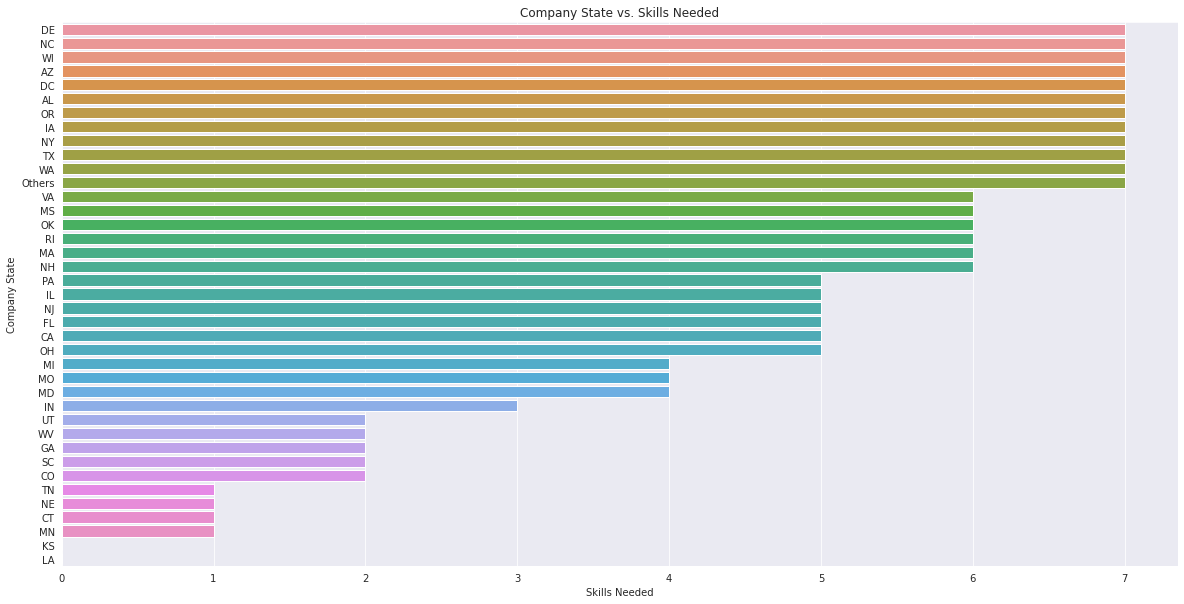

In [96]:
data_salary_est = data_salary_est.sort_values(by = "Skills Needed", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_salary_est["Skills Needed"], y = data_salary_min.index).set_title("Company State vs. Skills Needed")

Text(0.5, 1.0, 'Company State vs. Workload Overall')

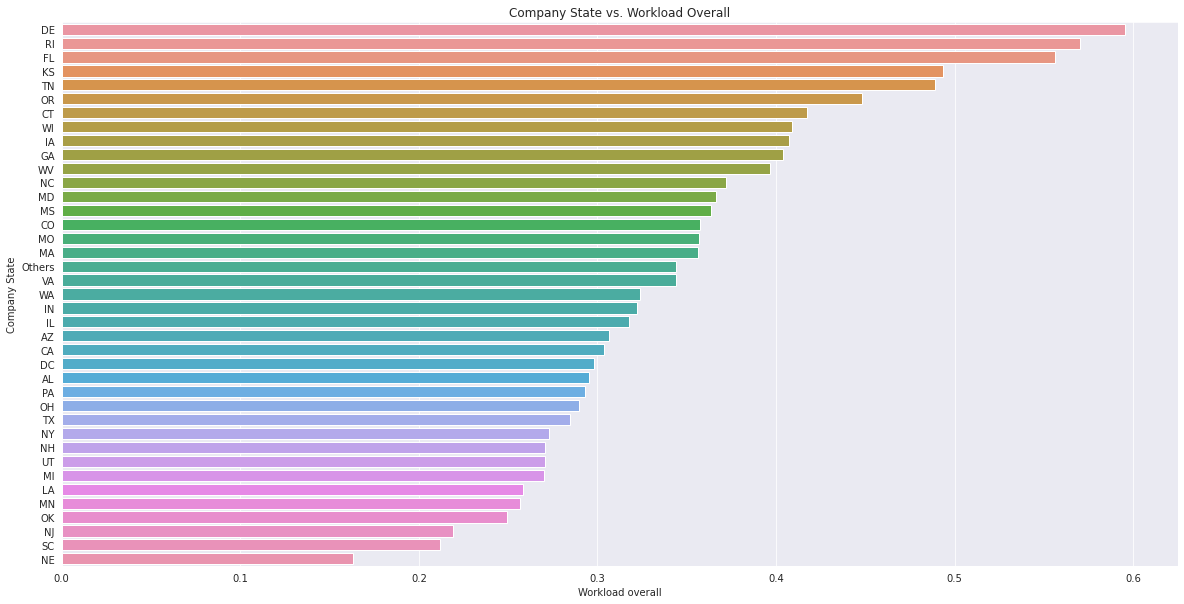

In [97]:
data_workload = data_workload.sort_values(by = "Workload overall", ascending = False)

plt.figure(figsize=(20,10))

sns.barplot(x = data_workload["Workload overall"], y = data_workload.index).set_title("Company State vs. Workload Overall")

Berdasarkan grafik di atas, didapat 5 State dengan Workload tertinggi dan terendah yaitu:

Tertinggi
1. DE
2. RI
3. FL
4. KS
5. TN

Terendah
1. NE
2. SC
3. NJ
4. OK
5. MN

Text(0.5, 1.0, 'Workload Overall Distribution')

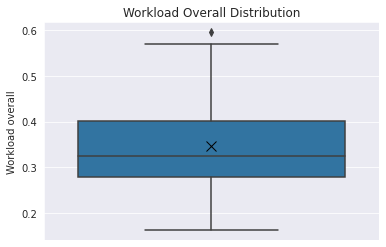

In [98]:
sns.boxplot(y = data_workload["Workload overall"], showmeans = True, meanprops = {"marker" : "x",
                                                                                   "markerfacecolor":"white", 
                                                                                   "markeredgecolor":"black",
                                                                                   "markersize":"10"}).set_title("Workload Overall Distribution")

Berdasarkan grafik di atas, dapat disimpulkan bahwa persebaran Workload Overall relatif merata pada setiap State, dengan 1 pencilan yaitu state "DE".

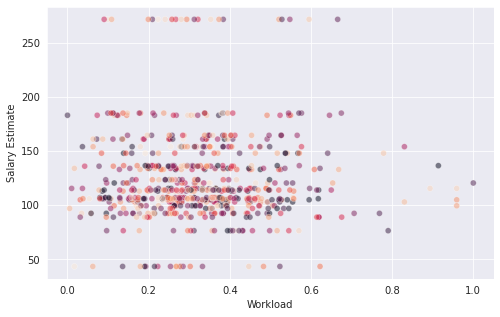

Nilai korelasi workload dan Salary Estimate: 0.0015589145967628377


In [99]:
plt.figure(figsize=(8,5))

# Fixing random state for reproducibility
np.random.seed(10120034)

N = len(data)
colors = np.random.rand(N)
corrcoef = data["Workload"].corr(data["Salary Estimate"])

sns.scatterplot(x = "Workload", y = "Salary Estimate", data = data, c = colors, alpha = 0.5)
plt.xlabel("Workload")
plt.ylabel("Salary Estimate")
plt.show()

print(f"Nilai korelasi workload dan Salary Estimate: {corrcoef}")

Berdasarkan seluruh plot di atas, dapat disimpulkan beberapa hal, di antaranya.
1. Secara umum, tingkat Workload yang tinggi tidak semata-mata menunjukkan bahwa seseorang akan memiliki gaji yang tinggi pula, vice versa. Meskipun pada state "DE" didapati bahwa state tersebut merupakan state dengan Workload tertinggi, dan dari plot sebelumnya pula didapat bahwa state tersebut merupakan state dengan gaji tertinggi, hal tersebut tidak menunjukkan bahwa pada state "DE" terdapat korelasi antara Workload dan Salary karena hanya terdapat 1 sampel pada state tersebut.
2. NY, DC, dan AZ merupakan state yang paling ideal dan direkomendasikan sebagai tempat untuk bekerja karena Workload di ketiga state tersebut relatif rendah, namun Salary Estimate-nya relatif tinggi. Hanya saja, untuk dapat bekerja di State tersebut Anda perlu menguasai semua skill yang ada, mulai dari Python hingga Deep Learning.
3. KS, TN, dan CT merupakan state yang kurang direkomendasikan sebagai tempat untuk bekerja karena Workload-nya yang relatif tinggi, sedangkan Salary Estimate-nya terbilang rendah.

#$$\text{TERIMA KASIH}$$